# Exploring Wikipedia's Network Structure in a Temporal Fashion
Authors: Felix Borum Burmester & Christian Vestergaard Djurhuus.

In this notebook, we will explore the temporal development of Marvel- and DC-Comics. We have used the Wikipedia Revisions api to scrape the Wikipedia pages of 2303 superheroes since the dawn of Wikipedia. We have used these pages to create a directed, temporal graph object that will allow us to understand the development of revisions.

We have also webscraped meta data from lists of female, black, latino, and asian superheroes and villains. With this meta data we were able to appoint node attributes to our graph with the help of document similarity (since different websites may call superheroes by different versions of their names).

<img src="G_plot_final.gif" width="750" align="center">

The red nodes here are Marvel characters, and the blue are DC characters!

Let's explore the data and its attributes!

## Exploration of Basic Stats in Network
### Node Analysis
Let's view the number of nodes with each label by time:

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#import data
meta_df = pd.read_csv('metadataproject.csv')
edgelist = pd.read_csv('corrected_edgelist.csv')

In [3]:
meta_df.head()

,Unnamed: 0,CharacterName,WikiLink,universe,asian,latino,woman,black,man,good,bad
0,0,Abomination,Abomination (character),Marvel,0,0,0,0,1,0,1
1,1,Absorbing Man,Absorbing Man,Marvel,0,0,0,0,1,0,1
2,2,Achebe,Achebe (comics),Marvel,0,0,0,0,0,0,0
3,3,Agent,Agent (comics),Marvel,0,0,0,0,1,1,0
4,4,Agent X,Agent X (Marvel Comics),Marvel,0,0,0,0,1,1,0


As you can see, there is not meta data for all nodes; Achebe has no gender, race or alignment in our data..

In [4]:
edgelist.head()

,source,target,timestamp
0,Abomination (character),Silver Surfer,2014
1,Abomination (character),Thor (Marvel Comics),2014
2,Abomination (character),Sprocket (comics),2014
3,Abomination (character),Glenn Talbot,2014
4,Abomination (character),MODOK,2014


The edgelist has timestamps for when the link is valid. This is used to later create time-specific snapshots of the graph!

Now we create a node list and merge it with our meta data

In [5]:
sourcenodes = pd.DataFrame(np.array(list(edgelist.groupby(['source','timestamp']).groups.keys())), columns = ['node','timestamp'])
targetnodes = pd.DataFrame(np.array(list(edgelist.groupby(['target','timestamp']).groups.keys())), columns = ['node','timestamp'])
#keep unique nodes and timestamps!
nodes =  pd.concat([sourcenodes,targetnodes]).drop_duplicates().reset_index(drop=True)

temp = meta_df.rename(columns={'WikiLink':'node'})
nodes = pd.merge(nodes, temp, on="node")
nodes = nodes.drop(columns=['Unnamed: 0'])
nodes.head()

,node,timestamp,CharacterName,universe,asian,latino,woman,black,man,good,bad
0,3-D Man,2007,3-D Man,Marvel,0,0,0,0,1,1,0
1,3-D Man,2008,3-D Man,Marvel,0,0,0,0,1,1,0
2,3-D Man,2009,3-D Man,Marvel,0,0,0,0,1,1,0
3,3-D Man,2010,3-D Man,Marvel,0,0,0,0,1,1,0
4,3-D Man,2011,3-D Man,Marvel,0,0,0,0,1,1,0


We need some pd.series to plot, so we use groupby and its features to get them and create three plots:

In [6]:
#get plotable data for marvel and dc
total_nodes_by_year = nodes.groupby('timestamp').size()
temp = nodes.groupby(['universe'])
dc_nodes_by_year, marvel_nodes_by_year = [temp.get_group(x) for x in temp.groups]
dc_nodes_by_year = dc_nodes_by_year.groupby('timestamp').size()
marvel_nodes_by_year = marvel_nodes_by_year.groupby('timestamp').size()

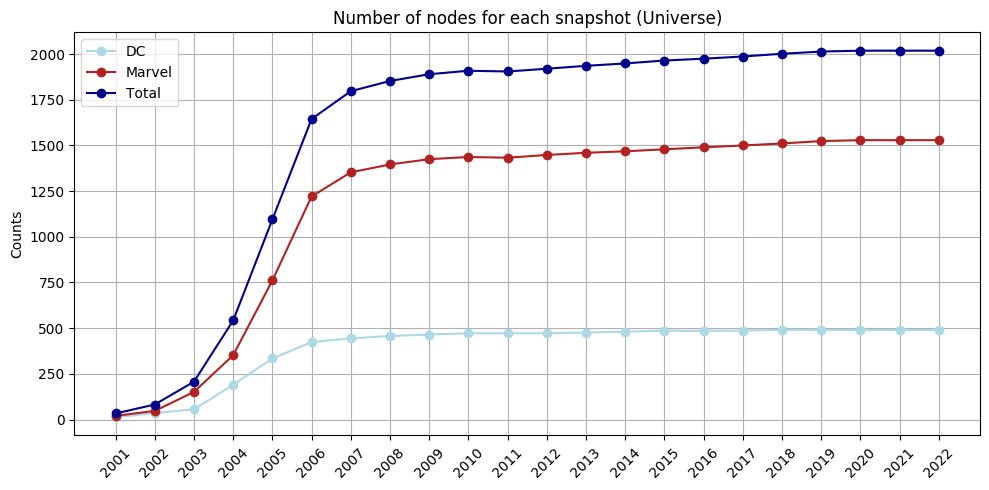

In [7]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.plot(dc_nodes_by_year.index, dc_nodes_by_year.values, '-o', c='lightblue', label='DC')
ax.plot(marvel_nodes_by_year.index, marvel_nodes_by_year.values, '-o', c='firebrick', label='Marvel')
ax.plot(total_nodes_by_year.index, total_nodes_by_year.values, '-o', c='darkblue',label='Total')
ax.set_title("Number of nodes for each snapshot (Universe)")
ax.set_ylabel("Counts")
ax.grid()
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We see here that there is a surge in number of nodes from 2003 to 2007 where it looks like it is more stable with a slight upwards trend. This might overshadow further analysis of the graph. One might consider making a cut and only view the data from 2007 to 2022.

Let's view some other features in the data!

In [8]:
#get plotable data for sex, race and alignment!
temp = nodes.groupby(['man'])
man_nodes_by_year = [temp.get_group(x) for x in temp.groups][1].groupby('timestamp').size()
temp = nodes.groupby(['woman'])
woman_nodes_by_year = [temp.get_group(x) for x in temp.groups][1].groupby('timestamp').size()
temp = nodes.groupby(['asian'])
asian_nodes_by_year = [temp.get_group(x) for x in temp.groups][1].groupby('timestamp').size()
temp = nodes.groupby(['latino'])
latino_nodes_by_year = [temp.get_group(x) for x in temp.groups][1].groupby('timestamp').size()
temp = nodes.groupby(['black'])
black_nodes_by_year = [temp.get_group(x) for x in temp.groups][1].groupby('timestamp').size()
temp = nodes.groupby(['good'])
good_nodes_by_year = [temp.get_group(x) for x in temp.groups][1].groupby('timestamp').size()
temp = nodes.groupby(['bad'])
bad_nodes_by_year = [temp.get_group(x) for x in temp.groups][1].groupby('timestamp').size()

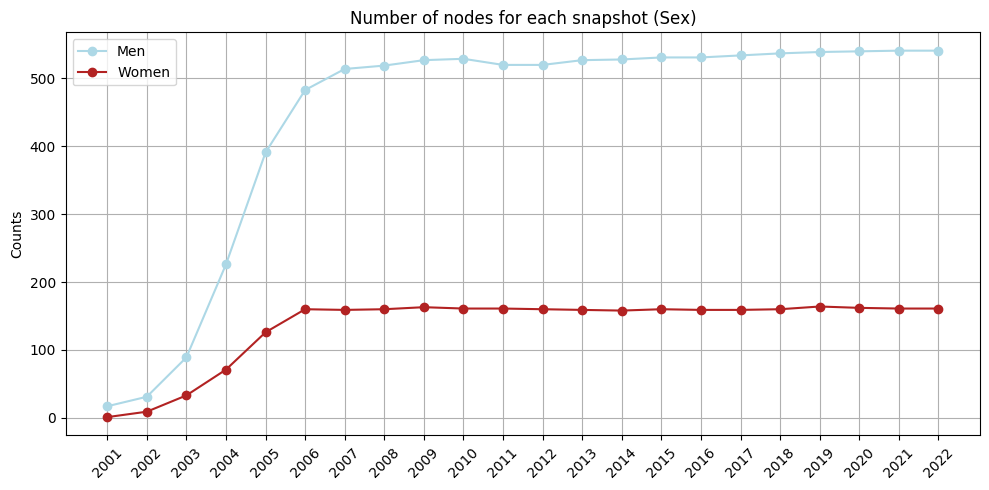

In [9]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.plot(man_nodes_by_year.index, man_nodes_by_year.values, '-o', c='lightblue', label='Men')
ax.plot(woman_nodes_by_year.index, woman_nodes_by_year.values, '-o', c='firebrick', label='Women')
ax.set_title("Number of nodes for each snapshot (Sex)")
ax.set_ylabel("Counts")
ax.grid()
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The same surge-trend seems to be present here as well. There is no indication from this plot that wokeism have created more superheroine wikipedia articles at least. Let's see the same plot with everything pre 2007 cut off:

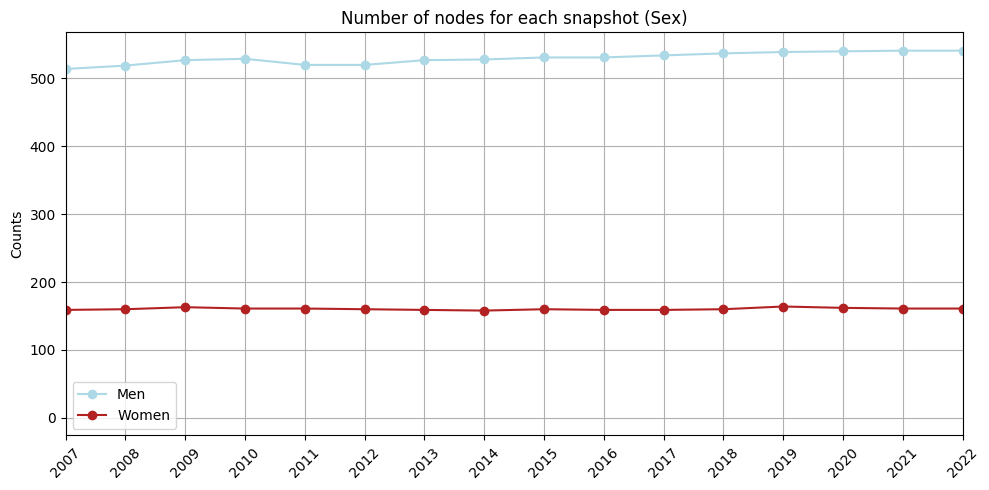

In [10]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.plot(man_nodes_by_year.index, man_nodes_by_year.values, '-o', c='lightblue', label='Men')
ax.plot(woman_nodes_by_year.index, woman_nodes_by_year.values, '-o', c='firebrick', label='Women')
ax.set_title("Number of nodes for each snapshot (Sex)")
ax.set_ylabel("Counts")
ax.grid()
ax.legend()
plt.xlim('2007','2022')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Our verdict does not change.. But what about race?

It was not possible to find any list of caucasian superheroes or villains. You might be able to conclude that the rest are white, but as some superheroes or villains are aliens, it would not be correct to assume them to be white. "Why not find a list of extraterestial superheroes?" Well, Thor, Loki and Odin are extraterestial but they are also caucasian. We found it best not to mess with this as the data would be highly inaccurate.

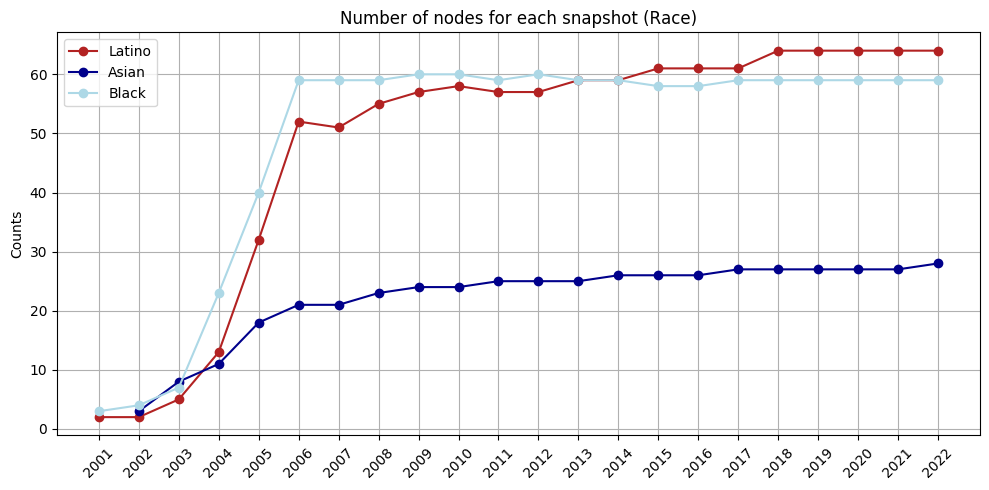

In [11]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.plot(latino_nodes_by_year.index, latino_nodes_by_year.values, '-o', c='firebrick', label='Latino')
ax.plot(asian_nodes_by_year.index, asian_nodes_by_year.values, '-o', c='darkblue',label='Asian')
ax.plot(black_nodes_by_year.index, black_nodes_by_year.values, '-o', c='lightblue',label='Black')
ax.set_title("Number of nodes for each snapshot (Race)")
ax.set_ylabel("Counts")
ax.grid()
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Here we see some interesting trends. The number of Wiki articles for Latinos and Asians seem to steadily increase while Black superhero articles seem to decline. Perhaps this is worth further exploration in the project?

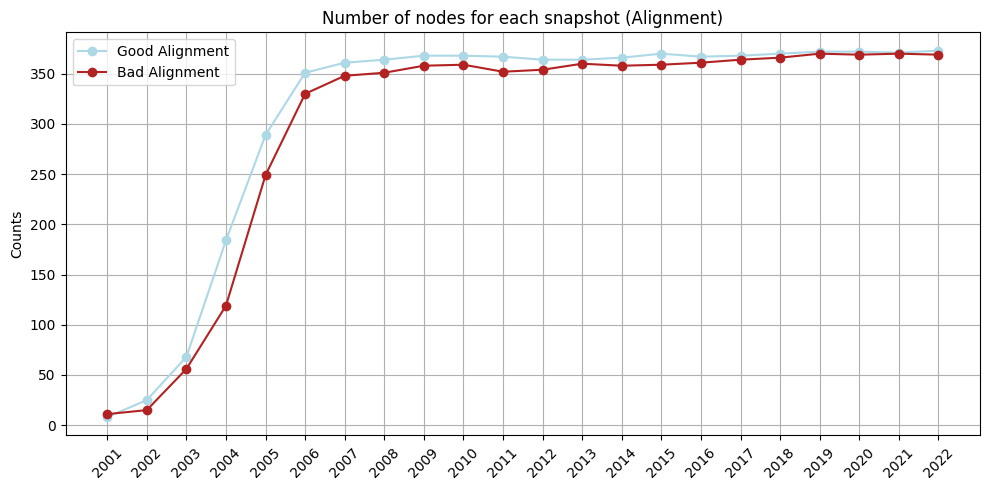

In [12]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.plot(good_nodes_by_year.index, good_nodes_by_year.values, '-o', c='lightblue', label='Good Alignment')
ax.plot(bad_nodes_by_year.index, bad_nodes_by_year.values, '-o', c='firebrick',label='Bad Alignment')
ax.set_title("Number of nodes for each snapshot (Alignment)")
ax.set_ylabel("Counts")
ax.grid()
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It makes sense that there would be about the same number of superheros as super villains (and that the trends would follow each other closely).

All plots of nodes seem to follow the general Wikipedia trend ([with the massive surge in 2003-2006](https://en.wikipedia.org/wiki/Wikipedia:Statistics)). It is still interesting that there have been a lot more pages created on male superheroes as compared to female superheroes in general. This could indicate that there are more male superheroes to create articles about and that the ones creating articles are more interested in them (perhaps because they are males themselves).

### Edge Analysis
In the following, the evolution of number of edges in the temporal Wikipedia-link superhero network will be investigated. To evaluate the evolution, we have decided to represent the temporal network as a sequence of static networks corresponding to a yearly snapshot of the original temporal network.

In [1]:
import os
import io
import re
import networkx as nx
import netwulf as nw 
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def setup_mpl():
    mpl.rcParams['font.family'] = "Times New Roman"
    return
setup_mpl()

In [3]:
df_marvel = pd.read_csv("files/marvel.csv", index_col=0, encoding='utf8')
df_marvel = df_marvel[df_marvel["WikiLink"].notna()]
df_dc = pd.read_csv("files/dc.csv", index_col=0, encoding='utf8')
df_dc = df_dc[df_dc["WikiLink"].notna()]
df_marvel['universe'] = 'Marvel'
df_dc['universe'] = 'DC'
df = pd.concat([df_marvel, df_dc], ignore_index=True, axis=0)
edgelist = pd.read_csv("corrected_edgelist.csv")
edgelist = edgelist.drop_duplicates(ignore_index=True)

The following figure illustrates the total number of edges at each yearly snapshot.

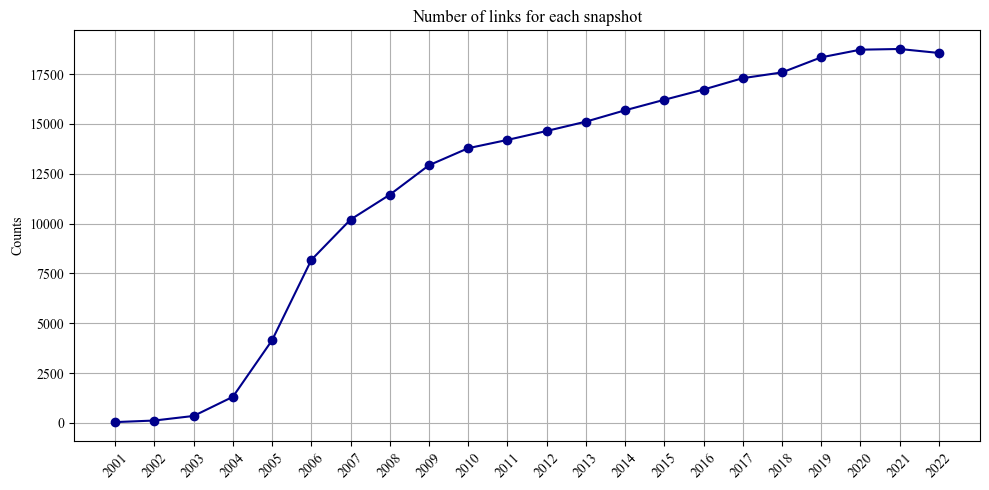

In [16]:
counts = edgelist.groupby("timestamp").size()
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.plot(counts.index.astype(str), counts.values, '-o', c='darkblue')
ax.set_title("Number of links for each snapshot")
ax.set_ylabel("Counts")
#ax.set_yscale("log")
ax.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

TODO: comment on trend

In [4]:
temp = pd.merge(edgelist, df, left_on='source', right_on='WikiLink')
temp = temp.rename(columns={"universe":"source universe"})
temp = temp.drop(columns=['CharacterName', 'WikiLink'])
temp = pd.merge(temp, df, left_on='target', right_on='WikiLink')
temp = temp.rename(columns={"universe":"target universe"})
temp = temp.drop(columns=['CharacterName', 'WikiLink'])
expanded_edgelist = temp.copy()

Furthermore, to investigate how many links DC and Marvel have respectively. The number of edges within each of the two comics universes was illustrated along with the number of edges across the two. Hence, the following figure demonstrates intra and inter universe links:

In [18]:
count_df = expanded_edgelist.groupby(["timestamp","source universe", "target universe"]).size().reset_index(name="counts")
dc_links = []
marvel_links = []
marvel_dc_links = []
dc_marvel_links = []
for idx, row in count_df.iterrows():
    if row["source universe"] == "DC" and row["target universe"] == "DC":
        dc_links.append(row.counts)
    elif row["source universe"] == "Marvel" and row["target universe"] == "Marvel":
        marvel_links.append(row.counts)
    elif row["source universe"] == "Marvel" and row["target universe"] == "DC":
        marvel_dc_links.append(row.counts)
    else:
        dc_marvel_links.append(row.counts)
marvel_dc_links.insert(0, 0)#No inter connected at year 2001

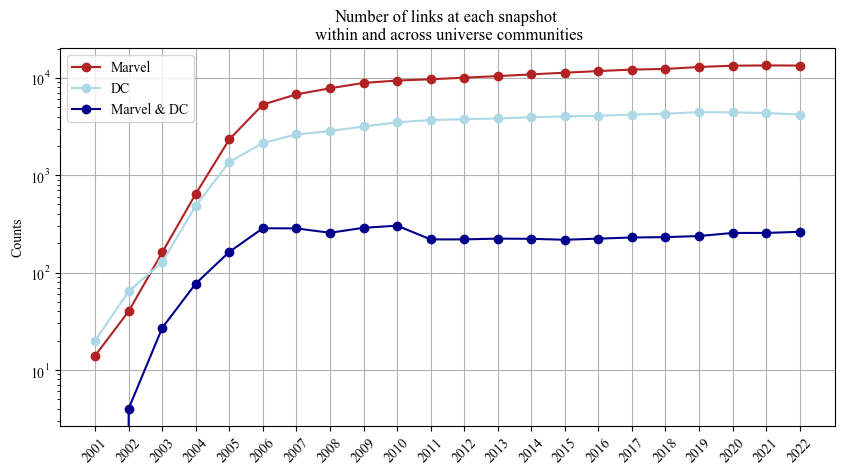

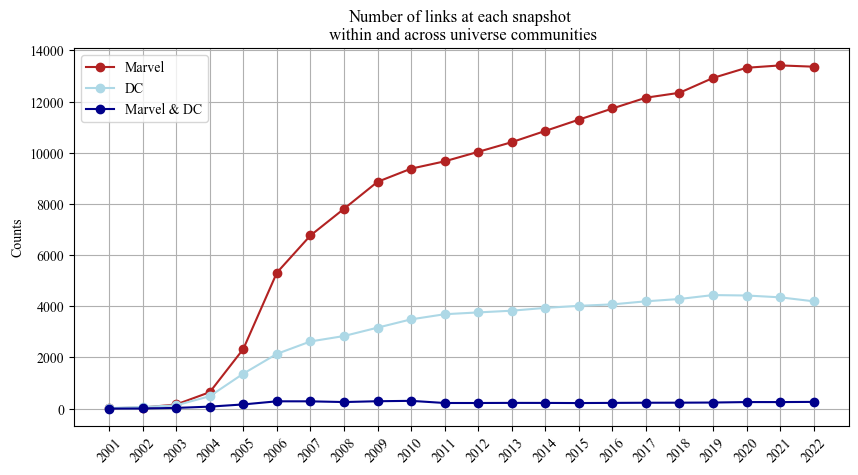

In [19]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)

ax.plot(count_df.timestamp.astype(str).unique(), marvel_links, '-o', c='firebrick',label="Marvel")
ax.plot(count_df.timestamp.astype(str).unique(), dc_links, '-o', c='lightblue',label="DC")
ax.plot(count_df.timestamp.astype(str).unique(), marvel_dc_links, '-o', c='darkblue',label="Marvel & DC")
ax.set_ylabel("Counts")
ax.legend()
ax.set_title("Number of links at each snapshot \n within and across universe communities")
ax.grid()
ax.set_yscale("log")
plt.xticks(rotation=45)
plt.show()

fig, ax = plt.subplots(figsize=(10,5), dpi=100)

ax.plot(count_df.timestamp.astype(str).unique(), marvel_links, '-o', c='firebrick',label="Marvel")
ax.plot(count_df.timestamp.astype(str).unique(), dc_links, '-o', c='lightblue',label="DC")
ax.plot(count_df.timestamp.astype(str).unique(), marvel_dc_links, '-o', c='darkblue',label="Marvel & DC")
ax.set_ylabel("Counts")
ax.legend()
ax.set_title("Number of links at each snapshot \n within and across universe communities")
ax.grid()
plt.xticks(rotation=45)
plt.show()

TODO: comment on trend & decide on which plot to show

Lastly, the number of edges each year for the genders male and female was illustrated:

In [11]:
metadata = pd.read_csv('metadataproject.csv')
temp = pd.merge(expanded_edgelist, metadata[['CharacterName','asian','latino','woman','man', 'good', 'bad']], left_on="source", right_on="CharacterName")
edgelist_female = temp[temp.woman==1]
edgelist_male = temp[temp.man==1]

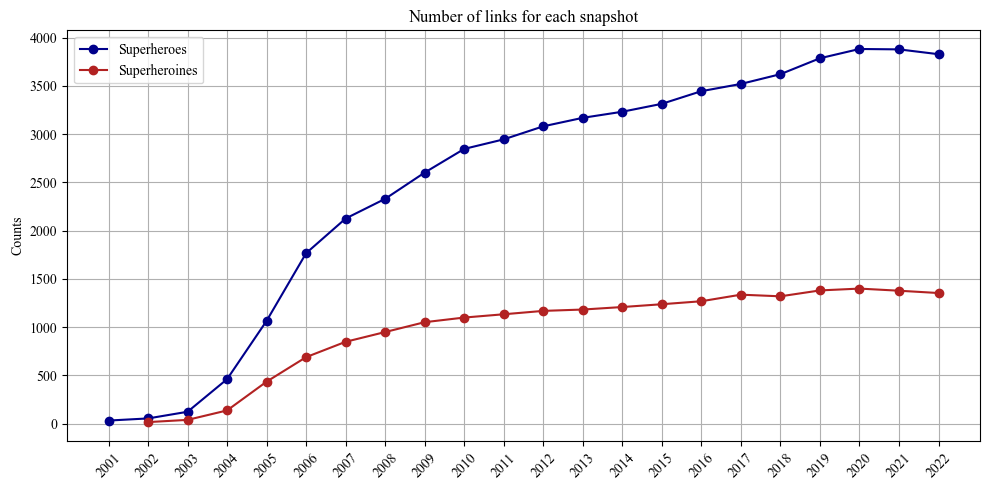

In [12]:
counts_male = edgelist_male.groupby("timestamp").size()
counts_female = edgelist_female.groupby("timestamp").size()
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.plot(counts_male.index.astype(str), counts_male.values, '-o', c='darkblue', label="Superheroes")
ax.plot(counts_female.index.astype(str), counts_female.values, '-o', c='firebrick', label="Superheroines")
ax.set_title("Number of links for each snapshot")
ax.set_ylabel("Counts")
#ax.set_yscale("log")
ax.grid()
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

TODO: Comment on trend & maybe adjust creation of figure to align with inter-intra approach.

### Degree Analysis
TODO: add more degree analysis
<br >
Let's first view the average degree of nodes in the graph at each timestep to determine if this follows the same trend as the edge analysis:

In [22]:
#create edgelist for each year
import networkx as nx
import numpy as np
edgelist_divided = {}
groups = edgelist.groupby('timestamp').groups
for key, index in groups.items():
    edgelist_divided[key] = edgelist.loc[index]

In [23]:
#we will load in the graph from a list of gml files
#as setting node attributes takes a while 
#(and does not look pretty)
graphs = {}
for key in np.arange(2001,2023,1):
    graphs[key] = nx.read_gml(f'graphs/DG_{key}')

In [24]:
#Calculate degrees
avg_degrees = {}
for key in graphs.keys():
    avg_degrees[key] = sum([graphs[key].in_degree(x) for x in graphs[key].nodes()])/graphs[key].number_of_nodes()

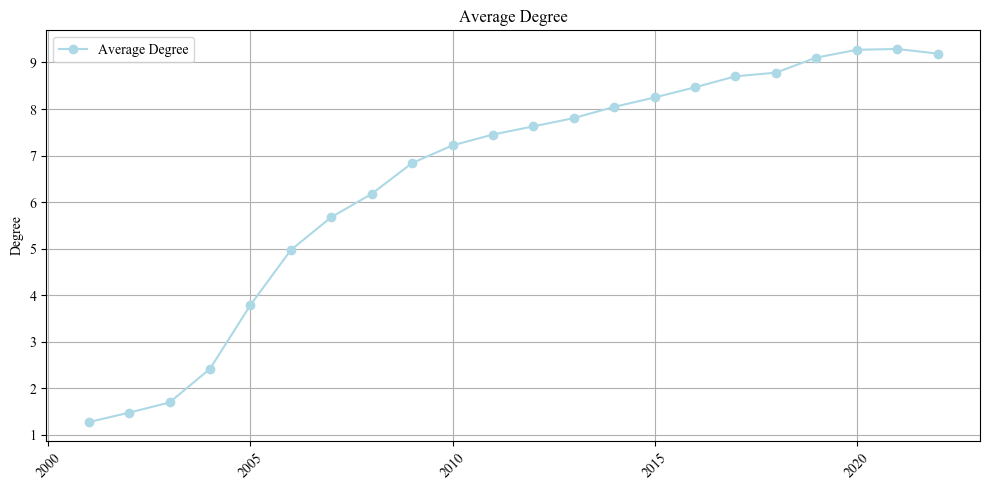

In [25]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.plot(list(avg_degrees.keys()), list(avg_degrees.values()), '-o', c='lightblue', label='Average Degree')
ax.set_title("Average Degree")
ax.set_ylabel("Degree")
ax.grid()
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It follows the exact same trend as the number of edges as expected. This is pretty obvious if you think about it since node degree is dependent on the number of edges it has, buuut it's nice to know for a fact xD

### Degree Distribution Analyses

TODO: maybe create edgelist here to ensure it is correct
<br >

To attempt to understand the characteristics of the temporal network, we analyse the degree distribution. Initially, the analysis of the degree distribution of the temporal network will be restricted to the final time step $t_{N}$ and treated as a static network. Subsequently, we will analyse the degree distribution at each timestep to investigate if any changes emerge in the network characteristics as time passes.

In [11]:
years = sorted(expanded_edgelist.timestamp.unique())
tN = years[-1]
edgelist_tN = expanded_edgelist[expanded_edgelist.timestamp==tN]
attrs_tN = {row.source: {'group': row['source universe']} for idx, row in edgelist_tN.iterrows()}
G_tN = nx.from_pandas_edgelist(edgelist_tN, create_using = nx.DiGraph)
#Adding attributes
nx.set_node_attributes(G_tN, attrs_tN)
#Fixing issue with nodes missing universe data
missing_attrs = {row.target: {'group': row['target universe']}for idx, row in edgelist_tN[edgelist_tN['target'].isin([u for u,v in G_tN.nodes(data=True) if not v])].iterrows()}
nx.set_node_attributes(G_tN, missing_attrs)
#Removing singleton nodes
G_tN.remove_nodes_from(list(nx.isolates(G_tN)))

The following figures illustrate the in-degree and out-degree distribution using a linear binning and linear x- and y-scale:

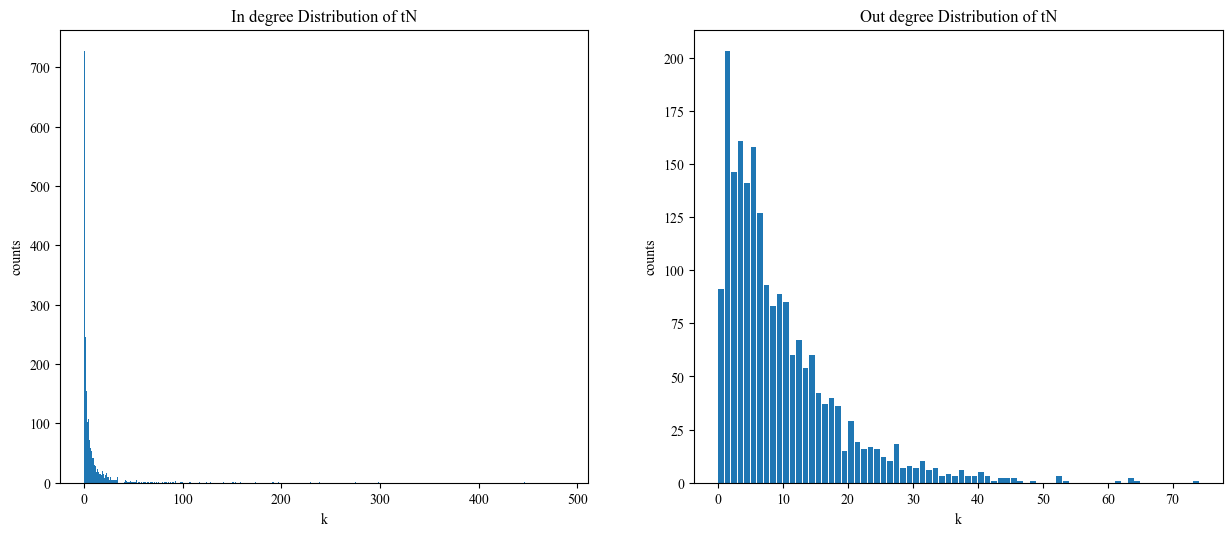

In [12]:
in_degrees = [y for (x,y) in G_tN.in_degree]
out_degrees = [y for (x,y) in G_tN.out_degree]

bins = np.arange(min(in_degrees), max(in_degrees), 1)
hist, edges = np.histogram(in_degrees, bins=bins)
x = (edges[1:] + edges[:-1])/2
width = bins[1]-bins[0]

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6), dpi=100)
ax1.bar(x, hist, width=width*0.91)
ax1.set_ylabel("counts")
ax1.set_xlabel("k")
ax1.set_title("In degree Distribution of tN")

bins = np.arange(min(out_degrees), max(out_degrees), 1)
hist, edges = np.histogram(out_degrees, bins=bins)
x = (edges[1:] + edges[:-1])/2
width = bins[1]-bins[0]
ax2.bar(x, hist, width=width*0.90)
ax2.set_ylabel("counts")
ax2.set_xlabel("k")
ax2.set_title("Out degree Distribution of tN")
plt.show()

The main finding in the above figures is the apparent difference between the characteristics of the in-degree and out-degree distributions. The out-degree distribution resembles a Poisson distribution, which typically is associated with the degree distribution of a random network. However, the in-degree distribution appears to follow a heavy-tailed power-law distribution often associated with scale-free networks. To further investigate if the two degree distributions follow the distributions proposed above, the in-degree and out-degree distributions are illustrated using a logarithmic binning and a logarithmic x- and y-scale. If the in-degree distribution follows a power-law distribution, the degree distribution should fall on a straight line when using a logarithmic scale:

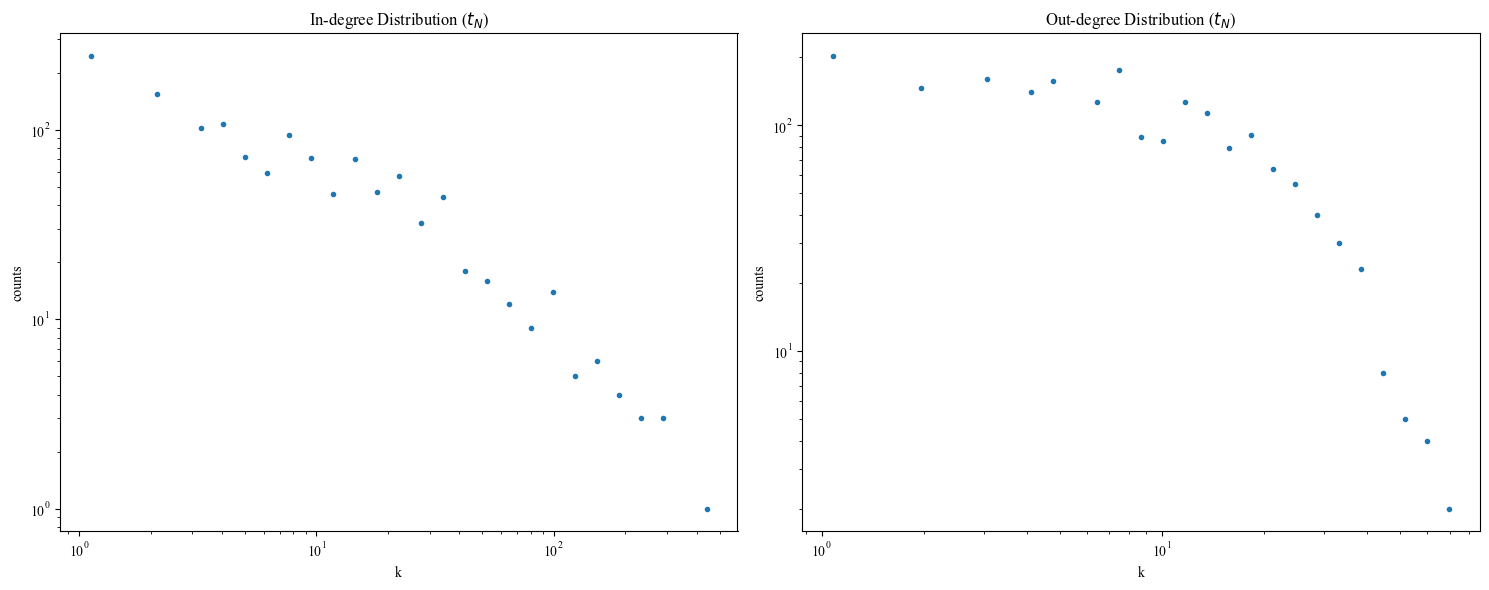

In [14]:
in_degrees = [d for n, d in G_tN.in_degree()]
min_in_deg =min(in_degrees)
max_in_deg =max(in_degrees)
min(in_degrees), max(in_degrees)

#bins = np.arange(min_in_deg, max_in_deg, 1) #Linear binning
bins = np.logspace(0, np.log10(max_in_deg), 30) # log binning
in_hist, in_edges = np.histogram(in_degrees, bins=bins)
in_x = (in_edges[1:]+in_edges[:-1])/2


out_degrees = [d for n, d in G_tN.out_degree()]
min_out_deg =min(out_degrees)
max_out_deg =max(out_degrees)
min(out_degrees), max(out_degrees)

#bins = np.arange(min_out_deg, max_out_deg, 1) #Linear binning
bins = np.logspace(0, np.log10(max_out_deg), 30) # log binning
out_hist, out_edges = np.histogram(out_degrees, bins=bins)
out_x = (out_edges[1:]+out_edges[:-1])/2

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6), dpi=100)

in_xx, in_yy = zip(*[(i,j) for (i,j) in zip(in_x, in_hist) if j > 0])
ax1.plot(in_xx, in_yy, marker='.', linestyle='None')
ax1.set_ylabel("counts")
ax1.set_xlabel("k")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_title("In-degree Distribution ($t_{N}$)")

out_xx, out_yy = zip(*[(i,j) for (i,j) in zip(out_x, out_hist) if j > 0])
ax2.plot(out_xx, out_yy, marker='.', linestyle='None')
ax2.set_ylabel("counts")
ax2.set_xlabel("k")
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_title("Out-degree Distribution ($t_{N}$)")
plt.tight_layout()
plt.show()

In-degree distributions of the network at $t_{N}$ appear to follow a scale-free network structure, while the out-degree distribution resembles the degree distribution of a random network. Intuitively, this finding makes sense given that the in-degree reflects the number of Wikipedia pages that reference this specific page, while the out-degree reflects how many other Wikipedia pages this given page references. Naturally, the out-degree will be more constrained than the in-degree, given that there is a naturally occurring limit to how many references one can gather on a single Wikipedia page. The in-degree is less constrained and somewhat reflects the popularity of a single page. A similar phenomenon can be seen in follower-based social media platforms e.g. Twitter, where it seems that the number of followers a person might have is almost unconstrained except for the number of users of the platform ([e.g. Justin Bieber having 113.8 million followers on twitter](https://en.wikipedia.org/wiki/List_of_most-followed_Twitter_accounts)), while the number of individuals a person might follow is limited by the cognitive demand of keeping up with all the content these individuals produce.

#### Temporal Analysis of Degree Distributions
Additionally, the in-degree and out-degree distributions are determined at each yearly snapshot of the temporal network to gain insight into how the degree distributions have changed with time. The degree distributions are plotted along side each other using a logarithmic binning and scale:

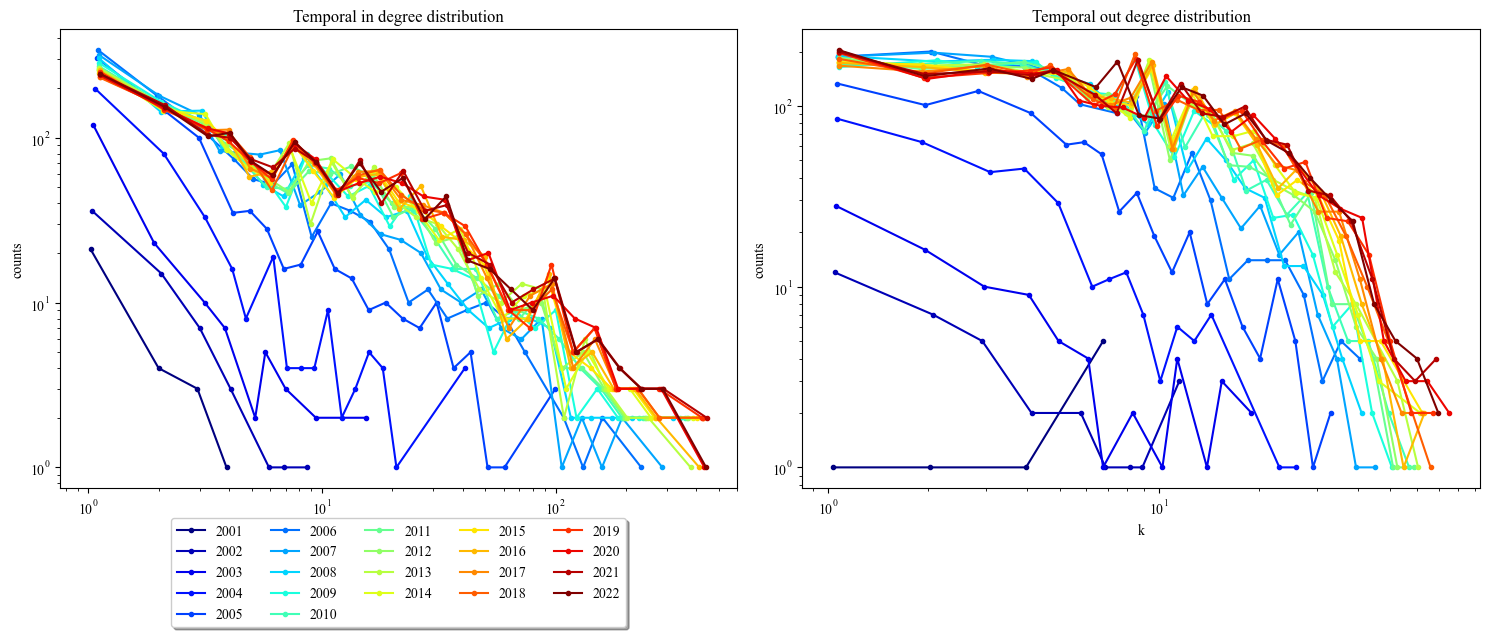

In [16]:
import matplotlib.pylab as pl
import networkx as nx

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6), dpi=100)

years = sorted([x for x in expanded_edgelist.timestamp.unique()])
n = len(years)
#colors = pl.cm.plasma(np.linspace(0,1,n))
colors = pl.cm.jet(np.linspace(0,1,n))
for idx, year in enumerate(years):
    edgelist_temp = expanded_edgelist[expanded_edgelist.timestamp == year]
    G_temp = nx.from_pandas_edgelist(edgelist_temp, create_using = nx.DiGraph)

    #Removing singleton nodes
    G_temp.remove_nodes_from(list(nx.isolates(G_temp)))

    in_degrees = [d for n, d in G_temp.in_degree()]
    min_in_deg =min(in_degrees)
    max_in_deg =max(in_degrees)
    
    #bins = np.arange(min_in_deg, max_in_deg, 1)
    bins = np.logspace(0, np.log10(max_in_deg), 30) # log binning
    in_hist, in_edges = np.histogram(in_degrees, bins=bins)
    in_x = (in_edges[1:]+in_edges[:-1])/2


    out_degrees = [d for n, d in G_temp.out_degree()]
    min_out_deg =min(out_degrees)
    max_out_deg =max(out_degrees)

    #bins = np.arange(min_out_deg, max_out_deg, 1) #Linear binning
    bins = np.logspace(0, np.log10(max_out_deg), 30) # log binning
    out_hist, out_edges = np.histogram(out_degrees, bins=bins)
    out_x = (out_edges[1:]+out_edges[:-1])/2
    
    in_xx, in_yy = zip(*[(i,j) for (i,j) in zip(in_x, in_hist) if j > 0])
    ax1.plot(in_xx, in_yy, marker='.', c=colors[idx], label=str(year))
    ax1.set_ylabel("counts")
    ax1.set_xlabel("k")
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    ax1.set_title("Temporal in degree distribution")

    out_xx, out_yy = zip(*[(i,j) for (i,j) in zip(out_x, out_hist) if j > 0])
    ax2.plot(out_xx, out_yy, marker='.', c=colors[idx], label=str(year))
    ax2.set_ylabel("counts")
    ax2.set_xlabel("k")
    ax2.set_xscale("log")
    ax2.set_yscale("log")
    ax2.set_title("Temporal out degree distribution")
box = ax1.get_position()
ax1.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.tight_layout()
plt.show()

The figures illustrate that the temporal in-degree distribution converges into a degree distribution that resembles a power-law distribution. The temporal out-degree distribution also demonstrates that it converges into a distribution similar to a Poisson distribution when time passes. Furthermore, the figures indicate that the stability in the degree distributions increases, given that the yearly changes appear to decrease with time. 

## Revision Analysis

In [3]:
import pickle

In [6]:
path_folder = 'superheroes/'
df_revisions = pd.DataFrame()
df_revisions

total_counts = dict.fromkeys([2000 + n for n in range(1, 2022-2001 + 2)], 0)

for idx, row in tqdm(df.iterrows()):
    try:
        with open(path_folder + row.CharacterName + '/' + 'number_of_revisions.pkl', 'rb') as handle:
            revision_counts = pickle.load(handle)
            for key, item in revision_counts.items():
                total_counts[key] += item
    except Exception as e:
        print(f'An error occured: {e}')

for idx, row in tqdm(df.iterrows()):
    try:
        with open(path_folder + row.CharacterName + '/' + 'number_of_revisions.pkl', 'rb') as handle:
            revision_counts = pickle.load(handle)
        temp_rv_df = pd.DataFrame.from_dict({'counts':revision_counts.values(), 'Year':revision_counts.keys(), 'Character':[row.CharacterName]*len(list(revision_counts.keys()))})
        df_revisions = df_revisions.append(temp_rv_df, ignore_index=True)
    except Exception as e:
        print(f'An error occured: {e}')

1847it [00:01, 1173.89it/s]

An error occured: [Errno 2] No such file or directory: 'superheroes/Vidar/number_of_revisions.pkl'


2303it [00:01, 1247.41it/s]


An error occured: [Errno 2] No such file or directory: 'superheroes/Viperie/number_of_revisions.pkl'
An error occured: [Errno 2] No such file or directory: 'superheroes/Vizacacha/number_of_revisions.pkl'
An error occured: [Errno 2] No such file or directory: 'superheroes/Volthoom/number_of_revisions.pkl'
An error occured: [Errno 2] No such file or directory: 'superheroes/Vroom, Hans/number_of_revisions.pkl'
An error occured: [Errno 2] No such file or directory: 'superheroes/Vul, Tri/number_of_revisions.pkl'
An error occured: [Errno 2] No such file or directory: "superheroes/X' Hal/number_of_revisions.pkl"
An error occured: [Errno 2] No such file or directory: 'superheroes/X-2-Y/number_of_revisions.pkl'
An error occured: [Errno 2] No such file or directory: 'superheroes/X-5 Super Agent/number_of_revisions.pkl'
An error occured: [Errno 2] No such file or directory: 'superheroes/X/number_of_revisions.pkl'
An error occured: [Errno 2] No such file or directory: 'superheroes/Xardo/number_of_

1730it [00:04, 406.80it/s]

An error occured: [Errno 2] No such file or directory: 'superheroes/Vidar/number_of_revisions.pkl'


2303it [00:05, 413.60it/s]

An error occured: [Errno 2] No such file or directory: 'superheroes/Viperie/number_of_revisions.pkl'
An error occured: [Errno 2] No such file or directory: 'superheroes/Vizacacha/number_of_revisions.pkl'
An error occured: [Errno 2] No such file or directory: 'superheroes/Volthoom/number_of_revisions.pkl'
An error occured: [Errno 2] No such file or directory: 'superheroes/Vroom, Hans/number_of_revisions.pkl'
An error occured: [Errno 2] No such file or directory: 'superheroes/Vul, Tri/number_of_revisions.pkl'
An error occured: [Errno 2] No such file or directory: "superheroes/X' Hal/number_of_revisions.pkl"
An error occured: [Errno 2] No such file or directory: 'superheroes/X-2-Y/number_of_revisions.pkl'
An error occured: [Errno 2] No such file or directory: 'superheroes/X-5 Super Agent/number_of_revisions.pkl'
An error occured: [Errno 2] No such file or directory: 'superheroes/X/number_of_revisions.pkl'
An error occured: [Errno 2] No such file or directory: 'superheroes/Xardo/number_of_

The following figure illustrates the total number of revisions within a specific year for the superheroes wikipedia pages:

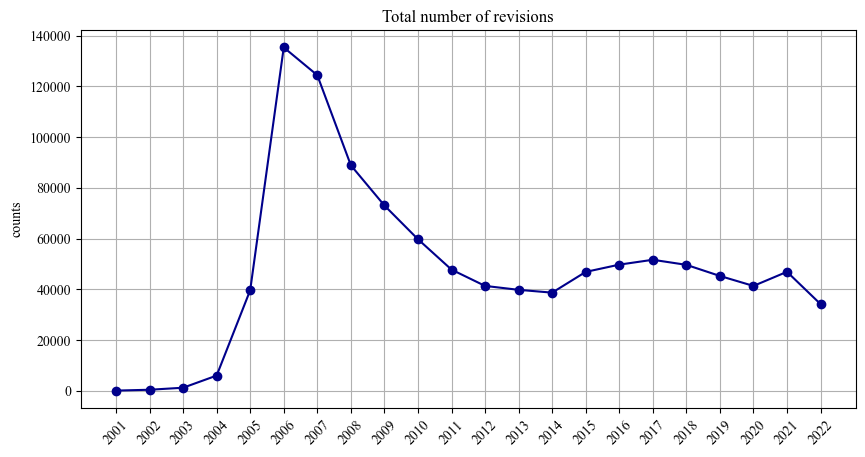

In [7]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.plot([str(item) for item in list(total_counts.keys())], total_counts.values(), '-o', c='darkblue')
ax.grid()
ax.set_ylabel("counts")
ax.set_title("Total number of revisions")
plt.xticks(rotation=45)
plt.show()

TODO: Comment on trend

In [13]:
#from pandas.api.types import CategoricalDtype

#cat_character = CategoricalDtype(df_revisions.Character.unique())
#df_revisions['Character'] = df_revisions['Character'].astype(cat_character)

temp = pd.merge(df_revisions, metadata, left_on='Character', right_on='CharacterName') 
#Creating female and male dataframe
df_male = temp[temp['man']==1]
df_women = temp[temp['woman']==1]

counts_women = df_women.groupby(['Year']).sum().counts
counts_men =  df_male.groupby(['Year']).sum().counts

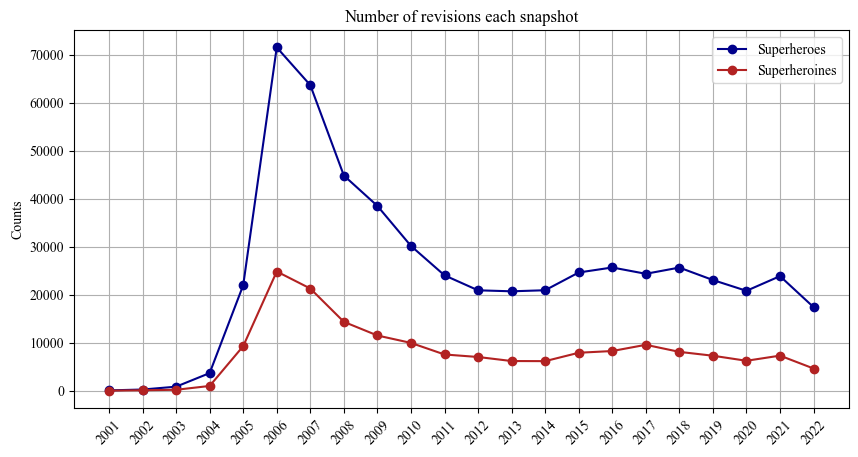

In [14]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.plot(counts_men.index.astype(str), counts_men.values, '-o', c='darkblue', label="Superheroes")
ax.plot(counts_women.index.astype(str), counts_women.values, '-o', c='firebrick', label="Superheroines")
ax.set_ylabel("Counts")
ax.set_title("Number of revisions each snapshot")
ax.grid()
ax.legend()
plt.xticks(rotation=45)
plt.show()

TODO: Comment on trend

### Investigation of selected superheros

#### Captain America

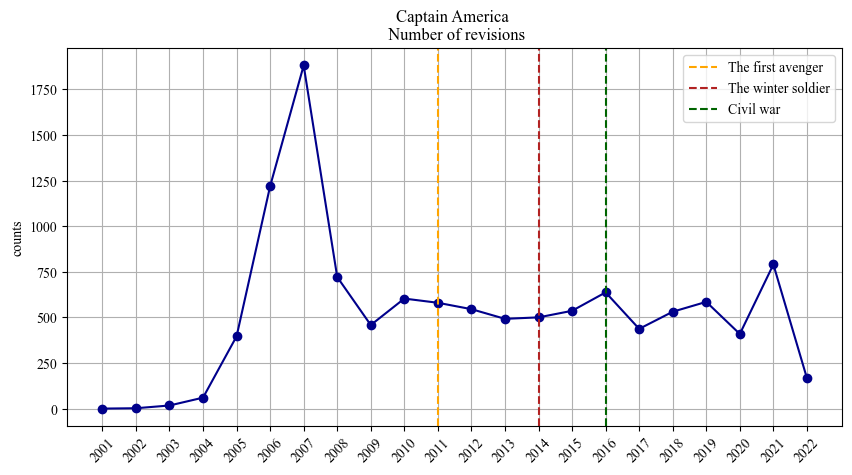

In [15]:
with open(path_folder + 'Captain America'+ '/' + 'number_of_revisions.pkl', 'rb') as handle:
    cap_revisions = pickle.load(handle)
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.plot([str(item) for item in list(cap_revisions.keys())], cap_revisions.values(), '-o', c='darkblue')
ax.grid()
plt.axvline(x="2011", linestyle='--',c='orange', label="The first avenger")
plt.axvline(x="2014", linestyle='--',c='firebrick', label="The winter soldier")
plt.axvline(x="2016", linestyle='--',c='darkgreen', label="Civil war")
ax.set_ylabel("counts")
ax.set_title("Captain America \n Number of revisions")
ax.legend()
plt.xticks(rotation=45)
plt.show()

TODO: comment on trend

#### Black Panther

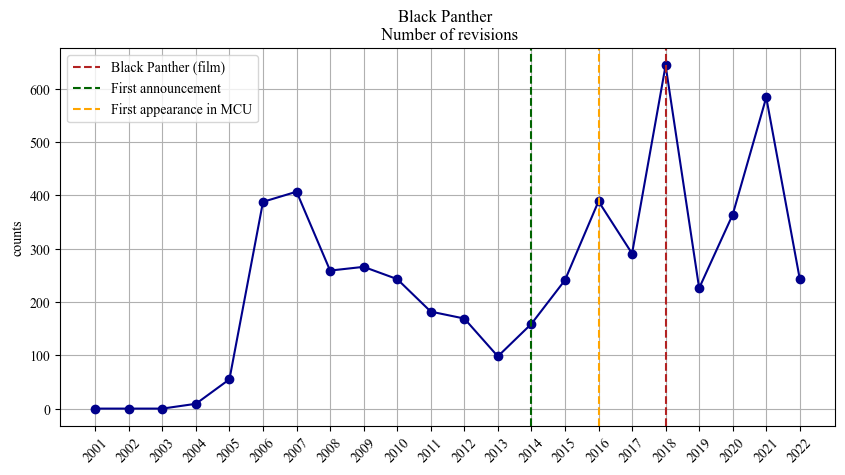

In [16]:
with open(path_folder + 'Black Panther'+ '/' + 'number_of_revisions.pkl', 'rb') as handle:
    black_panther_revisions = pickle.load(handle)
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.plot([str(item) for item in list(cap_revisions.keys())], black_panther_revisions.values(), '-o', c='darkblue')
ax.axvline(x="2018", linestyle='--',c='firebrick', label="Black Panther (film)")
ax.axvline(x="2014", linestyle='--', c='darkgreen', label="First announcement")
ax.axvline(x="2016", linestyle='--', c='orange', label="First appearance in MCU")
ax.grid()
ax.set_ylabel("counts")
ax.set_title("Black Panther \n Number of revisions")
ax.legend()
plt.xticks(rotation=45)
plt.show()

TODO: Comment on trend & decide where to add the revisions section

## Do the Graphs Differ from Random Graphs?
To answer this, we will perform some permutation tests.

> * First, we will shift the links (using an edge swap algorithm) between nodes and measure average node centrality.
> * Second, we will shift the labels of the nodes and again measure average node centrality between groups (Sex, Universe, Race and Alignment)

Let's get to it!

In [ ]:
import random
# Define our double edge swap algorithm (taken from a previous course)
def double_edge_swap(G: nx.DiGraph, N: int)->nx.DiGraph:
    '''
    First we choose random nodes. After that we choose to search edges through the neighbors as we assume
    that the number of neighbors is much smaller than the entire edge list, especially for large
    scale networks. This is the way!
    '''
    G_random = G.copy()
    num_swaps = 0
    edges = list(G_random.edges) #Define edges out of the loop. No need to update them!
    while num_swaps < N:
        (u,_), (x,_) = random.choices(edges, k=2) #Draw source nodes
        
        if u==x: #Same source 
            continue
        
        u_neighbors = list(G_random.neighbors(u))
        x_neighbors = list(G_random.neighbors(x))
        
        v = random.choices(u_neighbors)[0] #Draw target nodes
        y = random.choices(x_neighbors)[0]
        
        if v==y: #Same target
            continue

        if (x not in G_random.neighbors(u)) and (y not in G_random.neighbors(v)):
            G_random.add_edge(u, x) 
            G_random.add_edge(v, y)
            G_random.remove_edge(u, v) 
            G_random.remove_edge(x, y)
            num_swaps += 1
    return G_random 

In [ ]:
number_of_swapped_graphs = 50
#we could change this number but it takes quite a while
#to run this as it has to be done for 22 graphs as well
#to get the temporal aspect.

#while we are at it, lets get some tqdm to see if we can
#get coffee while we run it :D
from tqdm import tqdm

In [ ]:
dist_to_quantiles = []
for key,value in tqdm(graphs.items()):
    node_cen = []
    true_node_cen = np.mean(list(dict(nx.degree_centrality(value)).values()))
    for i in range(number_of_swapped_graphs):
        G_random = double_edge_swap(value.to_undirected(),nx.number_of_edges(value)+1000)
        node_cen.append(np.mean(list(dict(nx.degree_centrality(G_random)).values())))
    node_cen_quantiles = np.percentile(node_cen,95)
    dist_to_quantiles.append(true_node_cen-node_cen_quantiles)

In [ ]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.plot(np.arange(2001,2023,1), dist_to_quantiles, '-o', c='lightblue')
ax.set_title("Permutation Test With Edge Swaps")
ax.set_ylabel("Distance between true centrality and 95th quantile of random centrality")
ax.plot(np.arange(2001,2023,1), np.zeros(22), '--',c='firebrick', label = 'Below this line means no significanse')
ax.grid()
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

So you might be wondering what exactly this graph shows. The blue line shows the distance between our true graph's average node centrality and the 95th quantile of our random graphs' node centrality. As long as this is above 0 (or the dashed red line), our true graph's average node centrality is significantly different from that of a random network's!

As you can see, we do not cross the dashed line ever; our graph is significantly different from a random one!

What about a label swap? Let's see:

In [ ]:
#testing universe attribute
marvel_centralities = []
dc_centralities = []
for key, value in tqdm(graphs.items()):
    centrality = nx.degree_centrality(value)
    true_centrality = np.percentile(list(centrality.values()),95)
    G_random = value.copy()
    for _ in range(50):
        labels = list(nx.get_node_attributes(value, "Universe").values())
        random_labels = random.sample(labels, len(labels))
        values = dict(zip(value.nodes,random_labels))

        nx.set_node_attributes(G_random, values, name="random group")

        universe = nx.get_node_attributes(G_random, "random group")
        uni_centrality = {}
        for u,v in centrality.items():
            try:
                uni_centrality[universe[u]] += [v]
            except KeyError:
                uni_centrality[universe[u]] = [v]

    marvel_centralities.append(true_centrality-np.mean(np.mean(list(uni_centrality['Marvel']))))
    dc_centralities.append(true_centrality-np.mean(np.mean(list(uni_centrality['DC']))))

In [ ]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.plot(np.arange(2001,2023,1), marvel_centralities, '-o', c='lightblue',label='Marvel')
ax.plot(np.arange(2001,2023,1), dc_centralities, '-o', c='blue',label='DC')
ax.set_title("Permutation Test With Label Swaps (Universe)")
ax.set_ylabel("Distance between true centrality and 95th quantile of random centrality")
ax.plot(np.arange(2001,2023,1), np.zeros(22), '--',c='firebrick', label = 'Below this line means no significanse')
ax.grid()
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The universe attributes are not random. Let's see the gender attribute:

In [ ]:
#test on gender attribute
Male_centralities = []
Female_centralities = []
for key, value in tqdm(graphs.items()):
    centrality = nx.degree_centrality(value)
    true_centrality = np.percentile(list(centrality.values()),95)
    G_random = value.copy()
    for _ in range(50):
        labels = list(nx.get_node_attributes(value, "Sex").values())
        random_labels = random.sample(labels, len(labels))
        values = dict(zip(value.nodes,random_labels))

        nx.set_node_attributes(G_random, values, name="random group")

        universe = nx.get_node_attributes(G_random, "random group")
        uni_centrality = {}
        for u,v in centrality.items():
            try:
                uni_centrality[universe[u]] += [v]
            except KeyError:
                uni_centrality[universe[u]] = [v]

    Male_centralities.append(true_centrality-np.mean(np.mean(list(uni_centrality['Male']))))
    Female_centralities.append(true_centrality-np.mean(np.mean(list(uni_centrality['Female']))))

In [ ]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.plot(np.arange(2001,2023,1), Male_centralities, '-o', c='lightblue',label='Male')
ax.plot(np.arange(2001,2023,1), Female_centralities, '-o', c='blue',label='Female')
ax.set_title("Permutation Test With Label Swaps (Sex)")
ax.set_ylabel("Distance between true centrality and 95th quantile of random centrality")
ax.plot(np.arange(2001,2023,1), np.zeros(22), '--',c='firebrick', label = 'Below this line means no significanse')
ax.grid()
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We don't see any timestamp with random gender attributes either. Race?

In [ ]:
#test on race attribute
Black_centralities = []
Asian_centralities = []
Latino_centralities = []
for key, value in tqdm(graphs.items()):
    centrality = nx.degree_centrality(value)
    true_centrality = np.percentile(list(centrality.values()),95)
    G_random = value.copy()
    for _ in range(50):
        labels = list(nx.get_node_attributes(value, "Race").values())
        random_labels = random.sample(labels, len(labels))
        values = dict(zip(value.nodes,random_labels))

        nx.set_node_attributes(G_random, values, name="random group")

        universe = nx.get_node_attributes(G_random, "random group")
        uni_centrality = {}
        for u,v in centrality.items():
            try:
                uni_centrality[universe[u]] += [v]
            except KeyError:
                uni_centrality[universe[u]] = [v]

    Black_centralities.append(true_centrality-np.mean(np.mean(list(uni_centrality['Black']))))
    try:
        Asian_centralities.append(true_centrality-np.mean(np.mean(list(uni_centrality['Asian']))))
    except:
        pass
    Latino_centralities.append(true_centrality-np.mean(np.mean(list(uni_centrality['Latino']))))

In [ ]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.plot(np.arange(2001,2023,1), Black_centralities, '-o', c='lightblue',label='Black')
ax.plot(np.arange(2002,2023,1), Asian_centralities, '-o', c='blue',label='Asian')
ax.plot(np.arange(2001,2023,1), Latino_centralities, '-o', c='purple',label='Latino')
ax.set_title("Permutation Test With Label Swaps (Race)")
ax.set_ylabel("Distance between true centrality and 95th quantile of random centrality")
ax.plot(np.arange(2001,2023,1), np.zeros(22), '--',c='firebrick', label = 'Below this line means no significanse')
ax.grid()
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Neither race is random. It is interesting that there is no Asian superheroes in 2001 by the way.

Finally, we have good and bad alignment:

In [ ]:
#test on alignment attribute
Good_centralities = []
Bad_centralities = []
for key, value in tqdm(graphs.items()):
    centrality = nx.degree_centrality(value)
    true_centrality = np.percentile(list(centrality.values()),95)
    G_random = value.copy()
    for _ in range(50):
        labels = list(nx.get_node_attributes(value, "Alignment").values())
        random_labels = random.sample(labels, len(labels))
        values = dict(zip(value.nodes,random_labels))

        nx.set_node_attributes(G_random, values, name="random group")

        universe = nx.get_node_attributes(G_random, "random group")
        uni_centrality = {}
        for u,v in centrality.items():
            try:
                uni_centrality[universe[u]] += [v]
            except KeyError:
                uni_centrality[universe[u]] = [v]

    Good_centralities.append(true_centrality-np.mean(np.mean(list(uni_centrality['Good']))))
    Bad_centralities.append(true_centrality-np.mean(np.mean(list(uni_centrality['Bad']))))

In [ ]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.plot(np.arange(2001,2023,1), Good_centralities, '-o', c='lightblue',label='Good')
ax.plot(np.arange(2001,2023,1), Bad_centralities, '-o', c='blue',label='Bad')
ax.set_title("Permutation Test With Label Swaps (Alignment)")
ax.set_ylabel("Distance between true centrality and 95th quantile of random centrality")
ax.plot(np.arange(2001,2023,1), np.zeros(22), '--',c='firebrick', label = 'Below this line means no significanse')
ax.grid()
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Again there is no insignificanse.

To sum up; the graph is by no means random neither the communities nor the labels.

## Centrality Evolution

A great deal of the nodes is already established in year 2007. The following section will investigate the stability of these nodes' eigenvector centrality as a function of time using pearson correlation.

In [ ]:
import seaborn as sns

In [ ]:
edgelist_2007 = edgelist[edgelist.timestamp==2007]
G_2007 = nx.from_pandas_edgelist(edgelist_2007, create_using=nx.DiGraph)
nodes = list(G_2007.nodes())

edgelist_2022 = edgelist[edgelist.timestamp==2022]
G_2022 = nx.from_pandas_edgelist(edgelist_2022, create_using=nx.DiGraph)
nodes_2022 = list(G_2022.nodes())

temp_list = []
for year in years[6:]:
    edgelist_temp = expanded_edgelist[expanded_edgelist.timestamp==year]
    G_temp = nx.from_pandas_edgelist(edgelist_temp, create_using=nx.DiGraph)
    temp_list.append(list(G_temp.nodes))

nodes_final = list(set(temp_list[0]) & set(temp_list[1]) 
    & set(temp_list[2]) & set(temp_list[3])
    & set(temp_list[4]) & set(temp_list[5])
    & set(temp_list[6]) & set(temp_list[7])
    & set(temp_list[8]) & set(temp_list[9])
    & set(temp_list[10]) & set(temp_list[11])
    & set(temp_list[12]) & set(temp_list[13])
    & set(temp_list[14]) & set(temp_list[15]))

eigenvals_centrality = np.zeros((len(nodes_final), len(temp_list)))
for idx, year in enumerate(years[6:]):
    edgelist_temp = expanded_edgelist[expanded_edgelist.timestamp==year]
    G_temp = nx.from_pandas_edgelist(edgelist_temp, create_using=nx.DiGraph)
    centrality_dict = nx.eigenvector_centrality(G_temp)
    #Getting nodes of interest
    eigenvals_centrality[:,idx] = [centrality_dict[node] for node in nodes_final if node in list(G_temp.nodes())]

corr = np.corrcoef(eigenvals_centrality, rowvar=False)

fig, ax = plt.subplots(figsize=(10,10), dpi=100)
sns.heatmap(corr, xticklabels=years[6:], yticklabels=years[6:], ax=ax)
ax.set_title("Pearson correlation between eigenvector centralities")
ax.tick_params(axis='y', rotation=0)
plt.show()

TODO: comment on figure (Increasing block and decreasing dependence through time)

## Clusters! How Do They Evolve?
In this section we will test two hypotheses:
> * The network grows in a "coral-growth" pattern. 
>  - This will be tested by running an InfoMap Ensemble algorithm to determine communities in the graph at $t_n$. Then we will create a heatmap showing when nodes are added to each community to see whether they are added in a coral pattern - meaning that nodes within the same community are added at the same time. Spoiler alert: We will try to find an even cooler way to show this during our project!
> * Show how communities share nodes throughout the time period.
>  - How?

In [39]:
from community import community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

G = graphs[2022].copy().to_undirected()

# split into marvel and DC
marvel = []
dc = []
for key, value in nx.get_node_attributes(G,'Universe').items():
    if value == 'Marvel':
        marvel.append(key)
    elif value == 'DC':
        dc.append(key)

G_marvel = G.subgraph(marvel)
G_dc = G.subgraph(dc)

#Keep only largest component
G_marvel = G_marvel.subgraph(sorted(nx.connected_components(G_marvel), key=len, reverse=True)[0])
G_dc = G_dc.subgraph(sorted(nx.connected_components(G_dc), key=len, reverse=True)[0])

# compute the best partition
partition_marvel = community_louvain.best_partition(G_marvel)
partition_dc = community_louvain.best_partition(G_dc)
n_marvel_communities = np.unique(list(partition_marvel.values()))
n_dc_communities = np.unique(list(partition_dc.values()))


dc_pss = {}
marvel_pss = {}
for key in graphs.keys():
    dc_ps = []
    marvel_ps = []
    for node in graphs[key].nodes():
        try:
            graphs[key-1].nodes()[node]
            continue
        except:
            pass
        try:
            p_number_marvel = partition_marvel[node]
            marvel_ps.append(p_number_marvel)
        except:
            try:
                p_number_dc = partition_dc[node]
                dc_ps.append(p_number_dc)
            except:
                continue
    dc_pss[key] = dc_ps
    marvel_pss[key] = marvel_ps

from collections import Counter

dc_counts = {}
for key, value in dc_pss.items():
    dc_counts[key] = Counter(value)
marvel_counts = {}
for key, value in marvel_pss.items():
    marvel_counts[key] = Counter(value)

In [40]:
#number of communities shown
n_communities=len(n_marvel_communities) + len(n_dc_communities)

In [41]:
partition_matrix = np.zeros((n_communities,22))
count = 0
for key, value in dc_counts.items():
    for key2, value2 in value.items():
        partition_matrix[key2+len(n_marvel_communities),count] = value2
    count += 1
count = 0
for key, value in marvel_counts.items():
    for key2, value2 in value.items():
        partition_matrix[key2,count] = value2
    count += 1

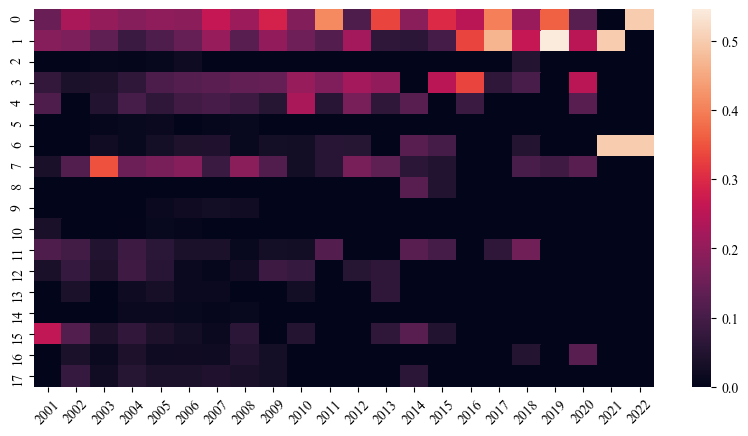

In [43]:
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import normalize

#normalize rows of matrix
partition_matrix_normalised = normalize(partition_matrix, axis=0, norm='l1')

fig, ax = plt.subplots(figsize=(10,5), dpi=100)
df_partition_matrix_normalised = pd.DataFrame(partition_matrix_normalised, index = np.arange(0,n_communities,1),
                  columns = [i for i in graphs.keys()])
sns.heatmap(df_partition_matrix_normalised)
plt.xticks(rotation=45)
plt.show()

This is normalised by years (columns) therefore, whenever we have a high value, we see that most of the nodes added that year was added to that community. Especially in the later years we do see a form of coral-growth.

We can also see the node with the highest degree in these communities to separate them from one another: (scroll a bit for a nice gif, else you can scroll through the output of the plotting cell to see in depth)

In [166]:
# get community names (largest degree node in each community)
d = dict(graphs[2022].degree())
sorted_degrees = {k: d[k] for k in sorted(d, key=d.get, reverse=True)}

community_names = {}
for key,value in sorted_degrees.items():
    try:
        com = partition_marvel[key]
        try:
            community_names[com]
        except:
            community_names[com] = key
    except:
        try:
            com = partition_dc[key]
            try:
                connumity_names[com]
            except:
                community_names[com+len(n_marvel_communities)] = key
        except:
            continue
    if len(community_names)==n_communities:
        break

In [217]:
def gen_colors(N:int,seed:int):
    '''
    N: number of colors you want to generate
    seed: seed
    colors: list of random hex colors
    '''
    import random
    random.seed(seed)
    colors = []
    for i in range(N):
        colors.append("#%06x" % random.randint(0, 0xFFFFFF))
    return colors

<ipython-input-229-d4fbe773de50>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(8,5),dpi=100)


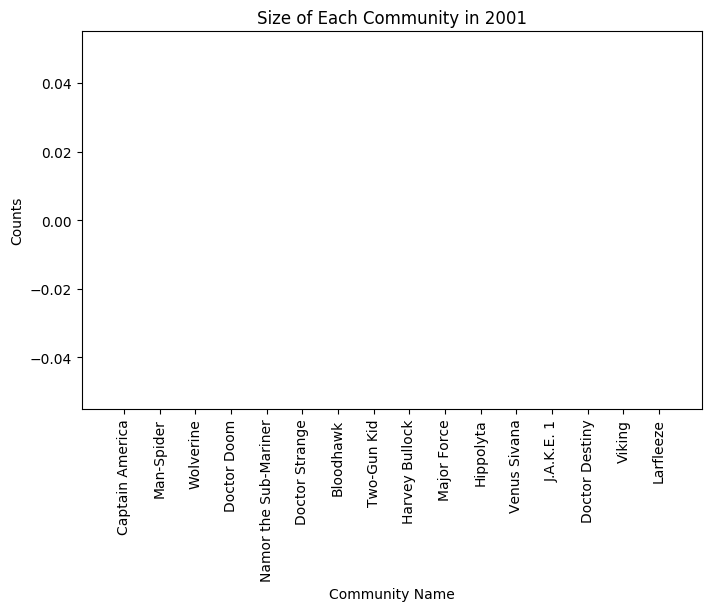

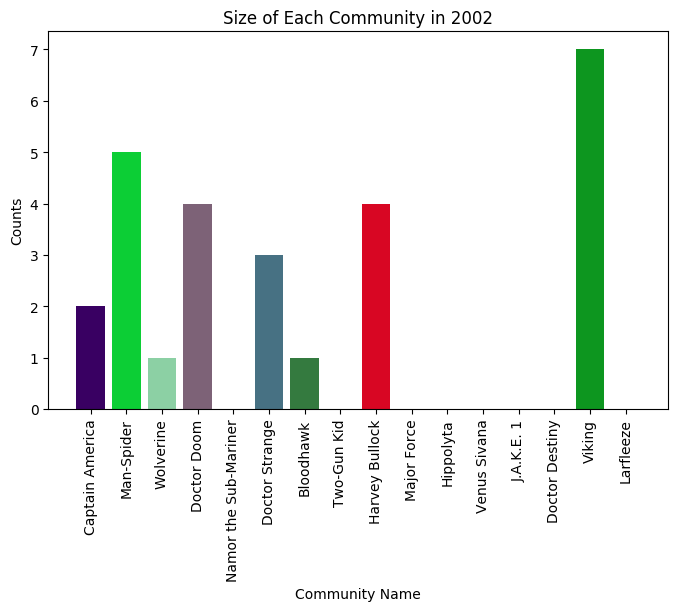

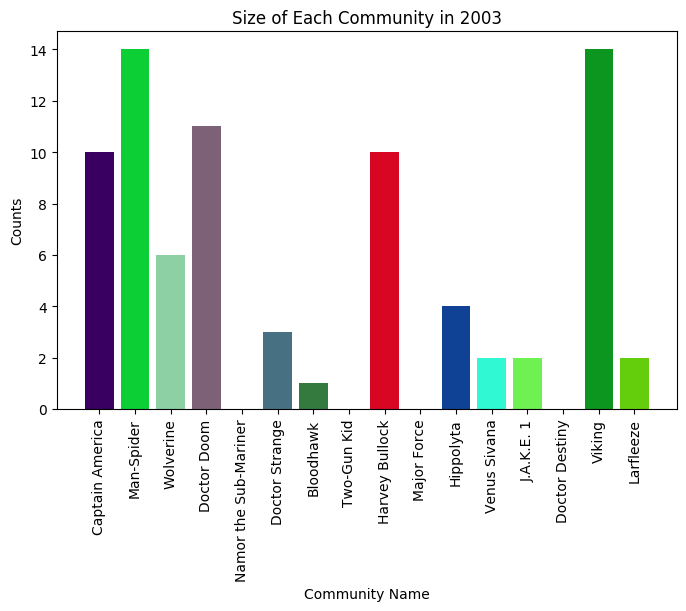

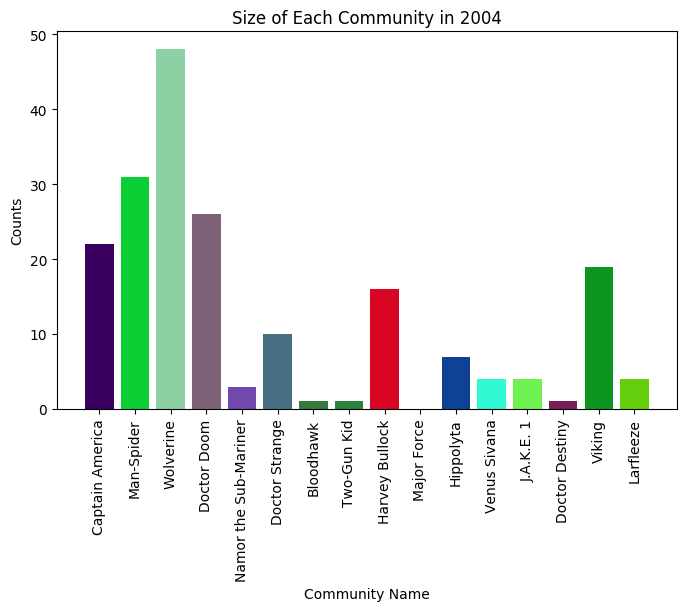

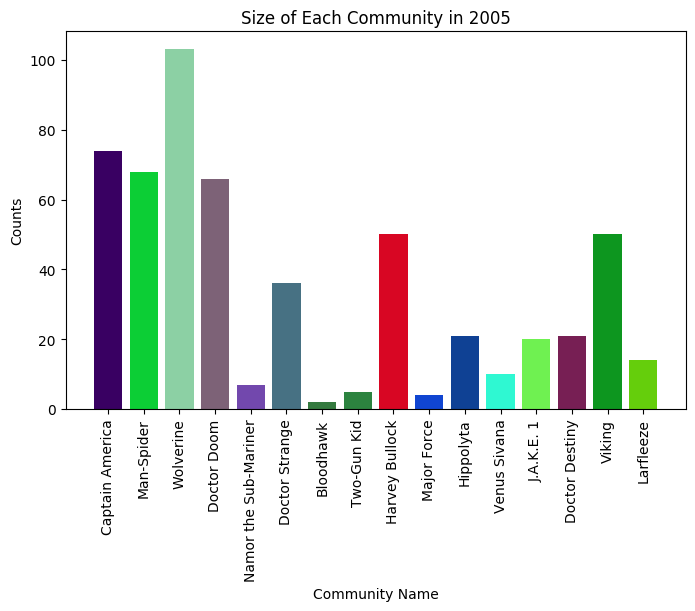

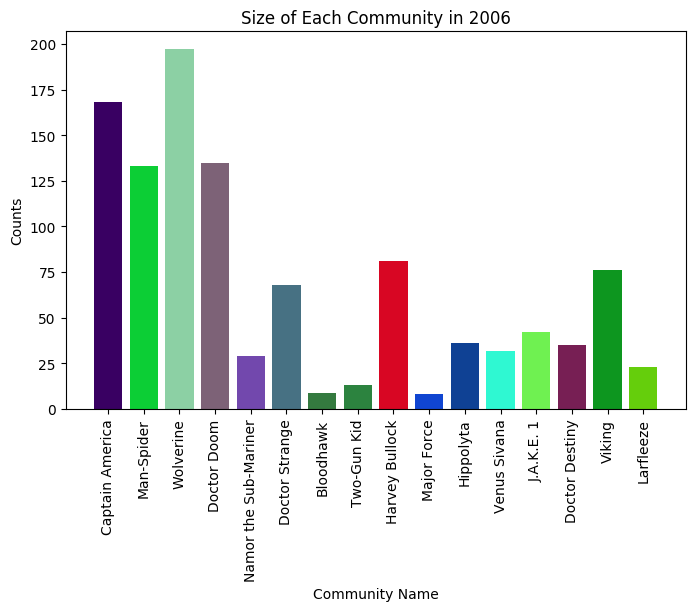

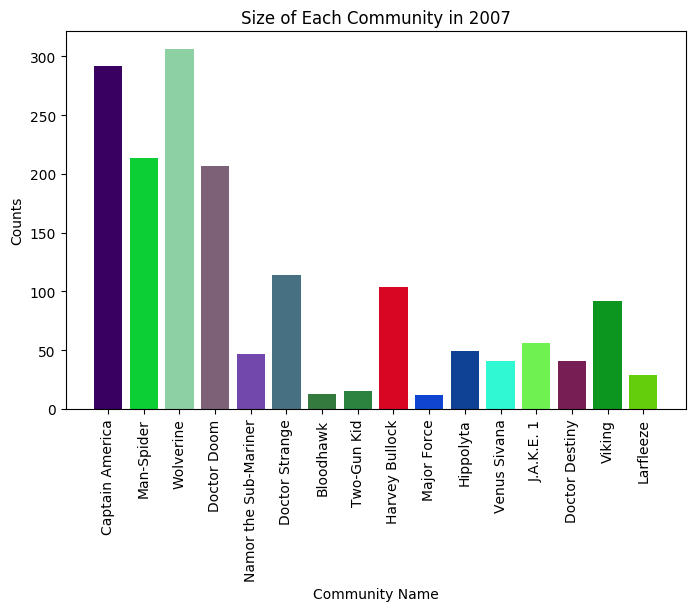

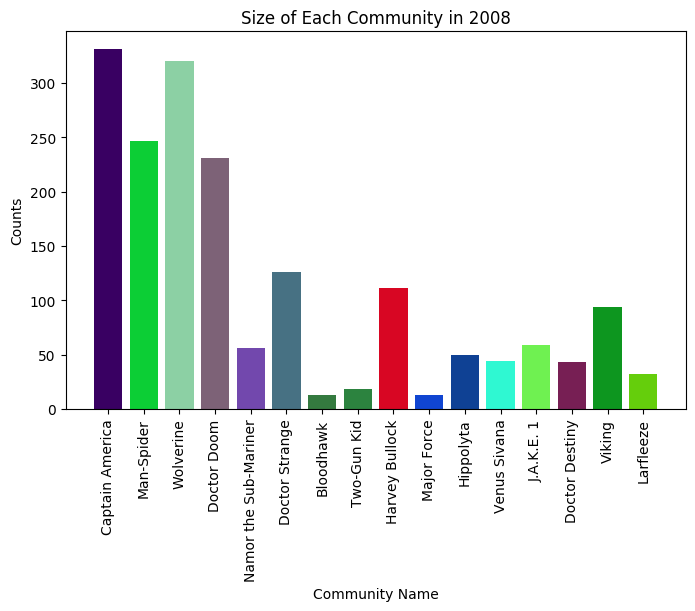

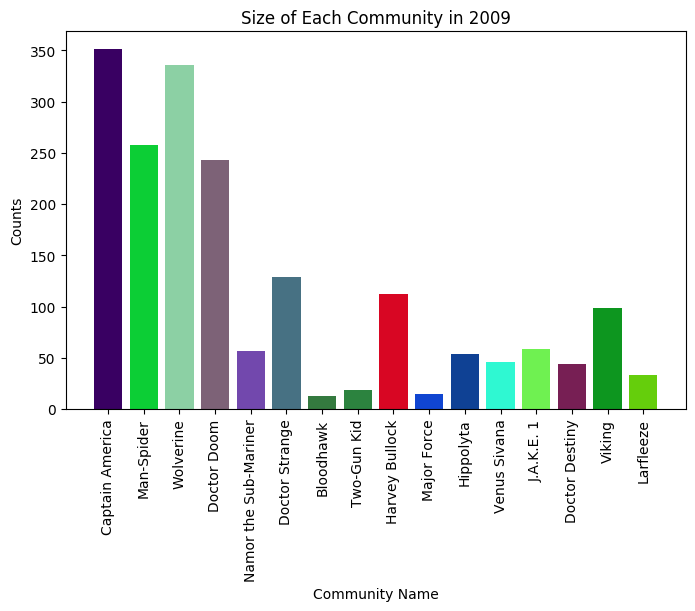

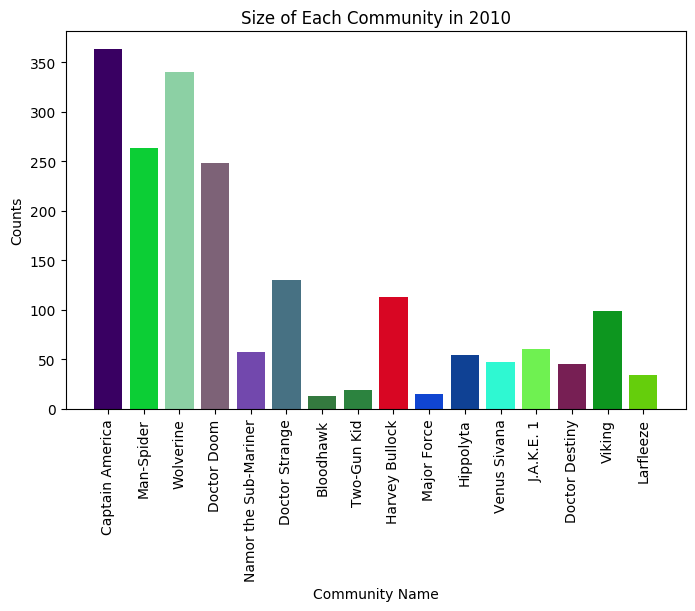

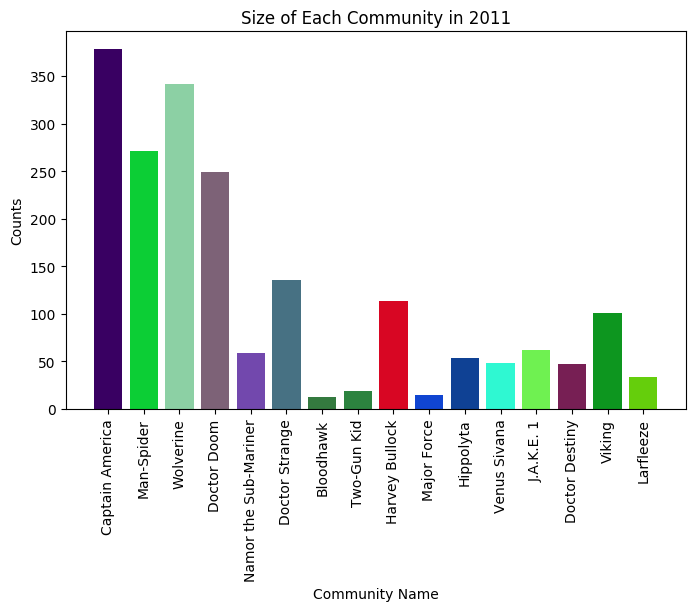

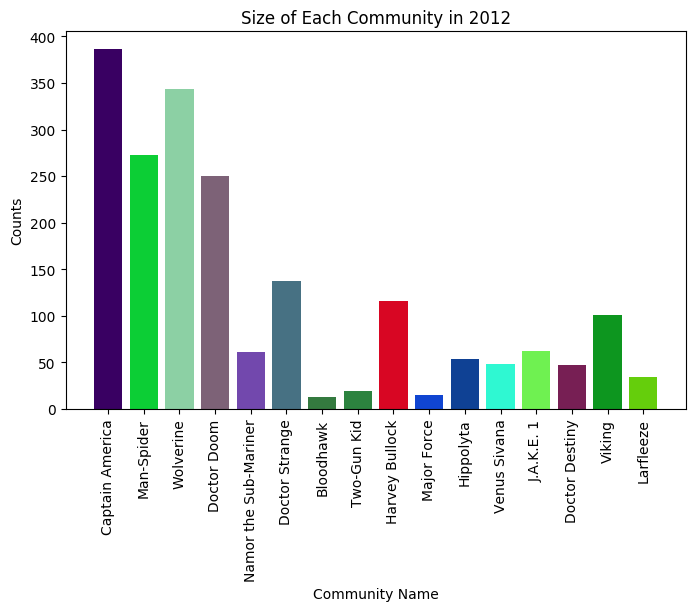

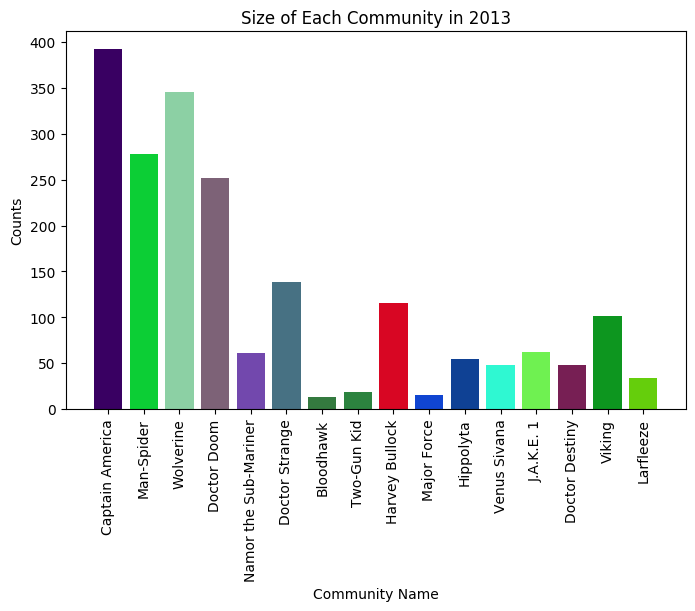

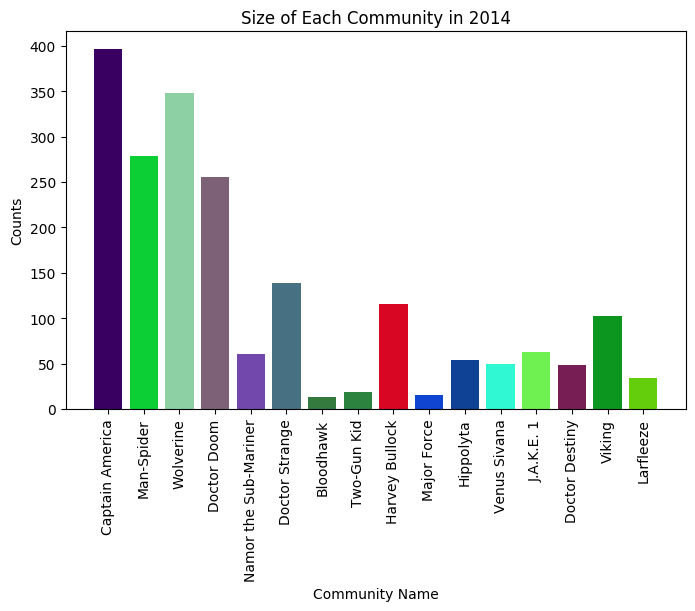

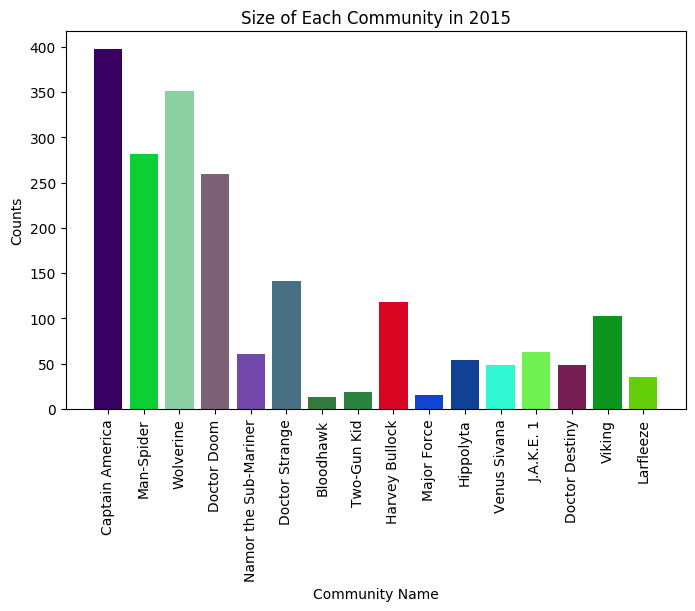

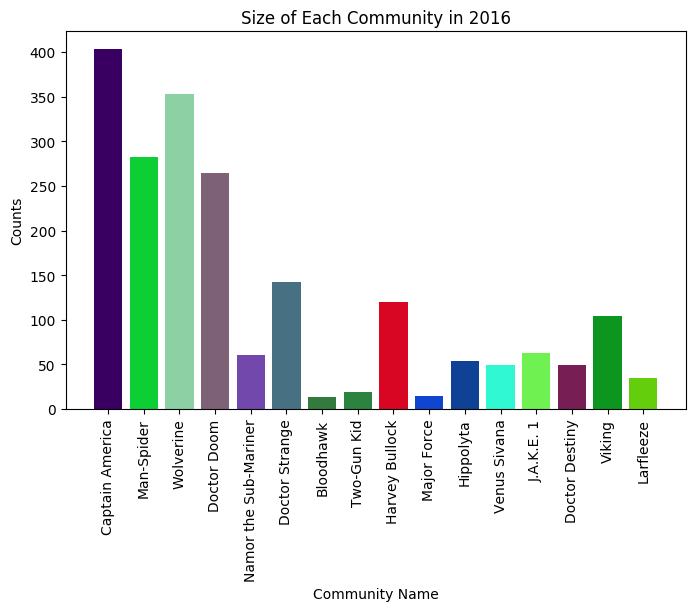

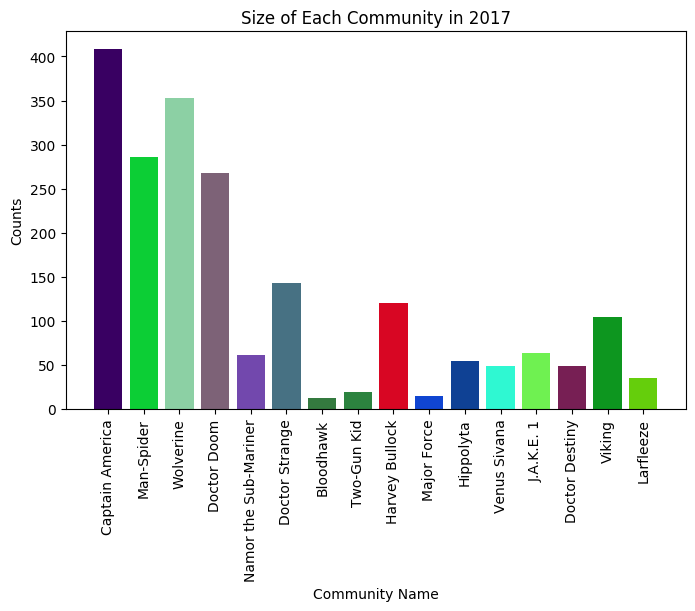

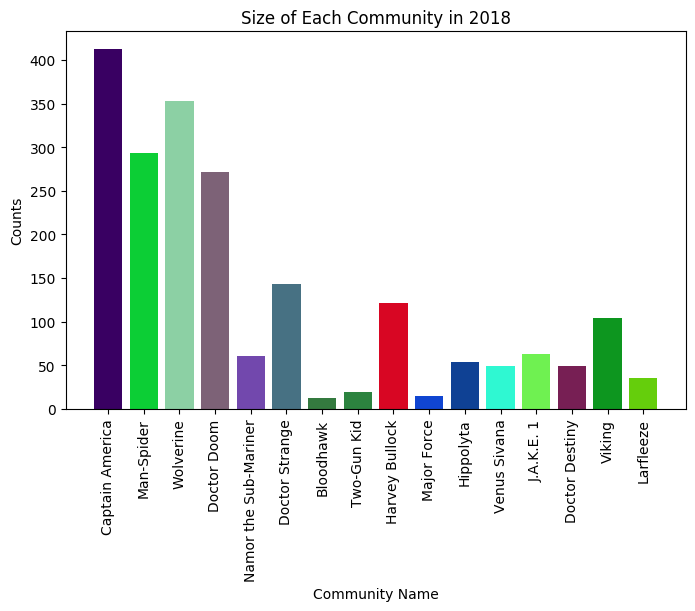

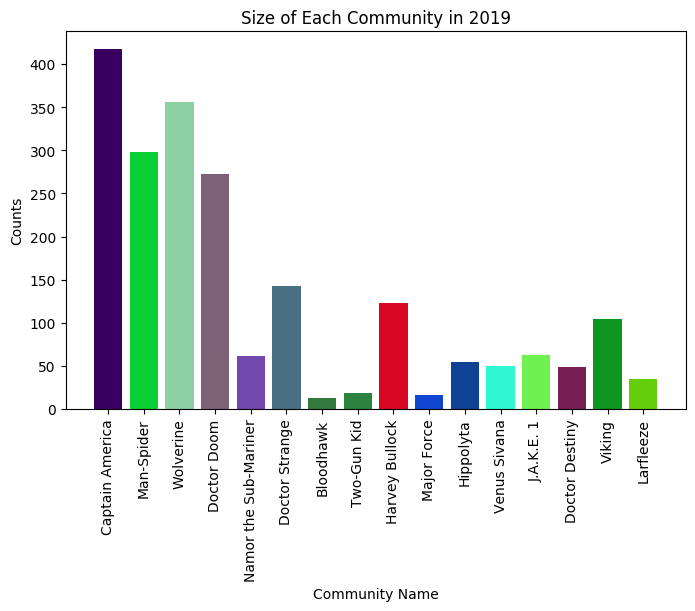

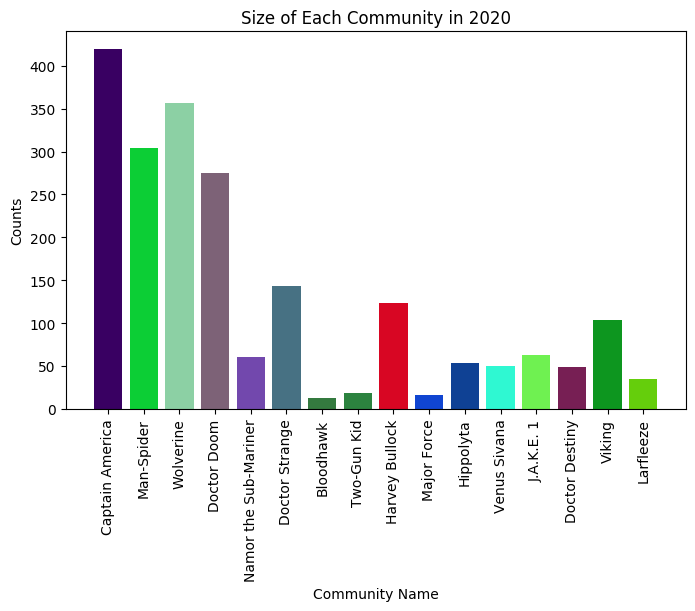

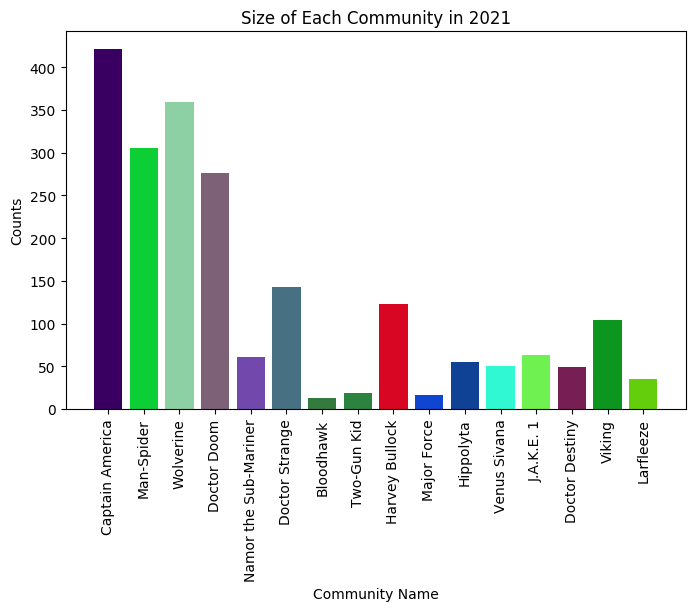

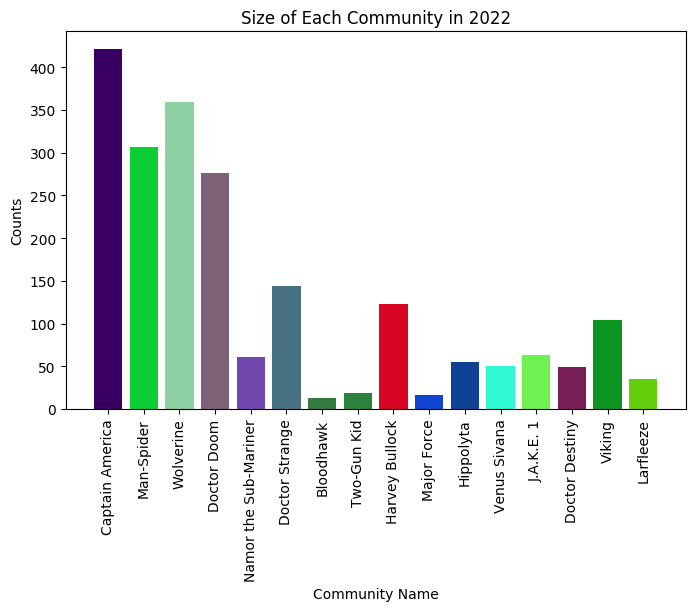

In [229]:
count = 0
for year in graphs.keys():
    fig, ax = plt.subplots(figsize=(8,5),dpi=100)
    ax.bar([list(nodes[nodes['node']==list(community_names.values())[k]]['CharacterName'])[0] for k in range(len(list(community_names.values())))], 
           partition_matrix[list(community_names.keys()),:count].sum(1),
          color=gen_colors(n_communities,42))
    ax.set_ylabel("Counts")
    ax.set_xlabel("Community Name")
    ax.set_title(f"Size of Each Community in {year}")
    plt.xticks(rotation=90)
    plt.savefig(f'plots/bar_plot_{year}.png', bbox_inches='tight')
    count+=1

In [230]:
import imageio
import os
import re

with imageio.get_writer('bar_plot_final.gif', mode='I', fps=0.5) as writer:
    for year in graphs.keys():
        image = imageio.imread(f'plots/bar_plot_{year}.png')
        writer.append_data(image)
    writer.close()

The gif looks like this:

<img src="bar_plot_final.gif" width="750" align="center">

We can see that the ratio of community sizes are quite quickly determined (Captain America being the largest and Man-Spider? being among the larger ones)

## Node Migration
The following section will investigate how the communities evolve in a temporal network by visualising the node migration between the communities determined at each snapshot. Therefore, an independent community detection will be conducted at each yearly static snapshot of the temporal network. 

The purpose of this investigation is to analyse how the temporal changes in the network impact the communities with an emphasis on growth/contraction, merging/splitting and birth/death of the superhero communities in the Wikipedia network through time. Visualising the node migration in an easily interpretable manner may help facilitate a greater understanding of which time-periods drastic changes in the community structures emerge throughout the lifespan of the temporal network. This understanding would then be beneficial to generate new questions and narrow the scope to significant periods.

Determining the node migration based on independent community detections relies on a robust community detection algorithm that would satisfyingly identify the same communities if the wiring of the network remains unchanged. Hence, we decided to investigate different approaches to increase the stability of well-established community detection methods. One solution is to utilise an ensemble approach, in which several runs of a specific community detection algorithm are used to determine the communities. More specifically, we adopt the ensemble Infomap which is a modification of the ensemble Louvain algorithm presented in [1]:

    1) Run N trials of Infomap using the same network

    2) Create a new undirected network

    3) Add edge between nodes u and v if the number of cooccurence in a specific community exceed threshold (e.g 90%) 

    4) Determine the connected components in the new network.


The connected components of the new network correspond to the communities of the original network because, for each iteration, the Infomap assigns every node to a single community. Hence, if a threshold of 90% is used, then if an edge is added in the new network, it will imply that the two nodes u and v cooccur in the same community in more than 90% of the realisations. For the remaining realisations in which u and v can be assigned different communities, it can not be frequent enough to exceed the threshold (90% + 90% > 100%). Hence, the resulting connected components will correspond to the communities of the network.




In [47]:
import random
import plotly.express as px
from infomap import Infomap
import plotly.graph_objects as go
from collections import Counter
from collections import defaultdict
import string
import networkx as nx
import numpy as np
from tqdm import tqdm
from itertools import combinations
import os
import pandas as pd

In [17]:

#Getting data
df_marvel = pd.read_csv("files/marvel.csv", index_col=0, encoding='utf8')
df_marvel = df_marvel[df_marvel["WikiLink"].notna()]
df_dc = pd.read_csv("files/dc.csv", index_col=0, encoding='utf8')
df_dc = df_dc[df_dc["WikiLink"].notna()]
df_marvel['universe'] = 'Marvel'
df_dc['universe'] = 'DC'
df = pd.concat([df_marvel, df_dc], ignore_index=True, axis=0)

edgelist = pd.read_csv("corrected_edgelist.csv")
temp = pd.merge(edgelist, df, left_on='source', right_on='WikiLink')
temp = temp.rename(columns={"universe":"source universe"})
temp = temp.drop(columns=['CharacterName', 'WikiLink'])
temp = pd.merge(temp, df, left_on='target', right_on='WikiLink')
temp = temp.rename(columns={"universe":"target universe"})
temp = temp.drop(columns=['CharacterName', 'WikiLink'])
expanded_edgelist = temp.copy()

### Stability of Ensemble Infomap

To investigate the usefulness of adopting an ensemble community detection approach, we examined the robustness of the partitions obtained with varying amounts of trials in the ensemble Infomap algorithm. More specifically, the ensemble Infomap was computed ten times with the number of trials equal to 1, 25, 50, 75, and 100. Subsequently, the adjusted rand index (ARI) was pairwisely determined for the obtained ten partitions at a given number of trials to evaluate the stability performance with varying number trials. To conduct this investigation the network at $t_{N}$ was used.

In [21]:
edgelist_temp = expanded_edgelist[expanded_edgelist.timestamp==2022]
G_2022 = nx.from_pandas_edgelist(edgelist_temp, create_using = nx.DiGraph)

In [48]:

def ensemble_infomap(graph, N, k=None, threshold = 0.9, verbose=False, seed=0):
    '''
    1) run several trials of Infomap on the same network,
    2) built a new network where a pair of the original nodes is linked if their total co-membership across all the Louvain trials is above a given threshold (e.g., 90%),
    3) identify the disjoints sets which represent the resulting communities.'''
    
    #preperation
    graph = nx.convert_node_labels_to_integers(graph, label_attribute="org_name")
    names = nx.get_node_attributes(graph, "org_name")
    
    #step 1
    tot_communities = []
    for iter_ in tqdm(range(N), disable=not verbose):
        
        im = Infomap(directed=True, silent=not verbose, seed=seed+iter_) #Using new seed
        for edge in graph.edges():
            im.addLink(*edge)
        im.run()
        communities = {}
        for node in im.tree:
            if node.is_leaf:
                communities[names[node.node_id]] = node.module_id
        tot_communities.append(communities)
    
    #preperation
    graph = nx.relabel_nodes(graph, names)
    
    #step 2
    G_new = nx.Graph()
    G_new.add_nodes_from(list(graph.nodes))
    node_pairs = combinations(list(graph.nodes), 2)
    for (u,v) in tqdm(node_pairs, disable=not verbose):
        co_occurence = 0
        for partitions in tot_communities:
            if partitions[u] == partitions[v]: 
                co_occurence += 1
        if co_occurence/N > threshold:
            G_new.add_edge(u, v)
        
        
    #step 3
    if k == None:
        k = nx.number_connected_components(G_new)
    k_greatest_components = {i: list(community) for i, community in enumerate(sorted(nx.connected_components(G_new), key=len, reverse=True)[:k])}
    
    
    return k_greatest_components


In [31]:
from sklearn.metrics import adjusted_rand_score
import scipy.stats as st
from itertools import combinations

N = 10
avg_ARI = []
CI_ARI = []

for n in tqdm(np.linspace(1,100,5)):
    partitions = []
    
    for idx in range(N):
        communities = ensemble_infomap(graph=G_2022, N=int(n), threshold=0.9, verbose=False, seed=(idx+N))
        #Reversing dictionary
        reversed_communities = {}
        for u, v in communities.items():
            for node in v:
                reversed_communities[node] = u 
        
        partitions.append(list(reversed_communities.values()))
        #partitions = list(communities.values())
        
    partition_pairs = list(combinations(partitions, 2))
    
    ARIs = []
    for (u, v) in partition_pairs:
        #print(adjusted_rand_score(u,v))
        ARIs.append(adjusted_rand_score(u,v))
        
    avg_ARI.append(np.mean(ARIs))
    #std_ARI.append(np.std(ARIs))
    CI_ARI.append(st.t.interval(confidence=0.95, df=N-1,
                        loc=np.mean(ARIs),
                        scale=st.sem(ARIs)))
    

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [22:48<00:00, 273.62s/it]


The following figure illustrates the average pairwise ARI as function of the number of trials. The average pairwise ARI is presented with a 95% confidence interval.

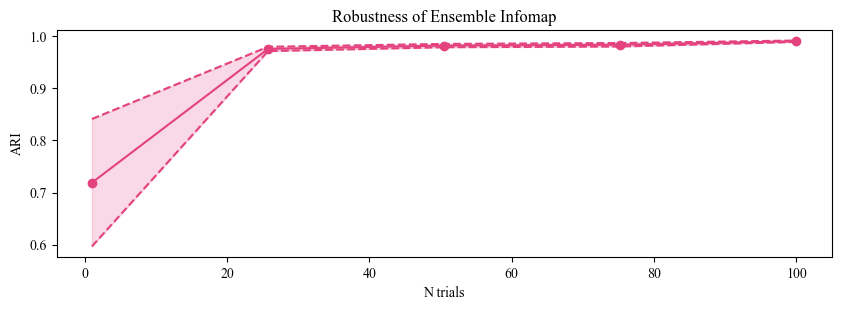

In [55]:
fig, ax = plt.subplots(figsize=(10,3), dpi=100)
xs = np.linspace(1,100,5)
ax.plot(xs, avg_ARI, '-o', label="RAA", color='#e3427d')
ax.fill_between(xs,
                 y1 = [x for (x,y) in CI_ARI],
                 y2 = [y for (x,y) in CI_ARI],
                 color='#e3427d', alpha=0.2)
ax.plot(xs, [x for (x,y) in CI_ARI], '--', color='#e3427d')
ax.plot(xs, [y for (x,y) in CI_ARI], '--', color='#e3427d')
ax.set_xlabel("N trials")
ax.set_ylabel("ARI")
ax.set_title("Robustness of Ensemble Infomap")
plt.show()
    

The figure demonstrates that the robustness of Ensemble Infomap significantly increases with the number of trials. Furthermore, the results also indicates that increasing the number of trials above 25 only leads to a marginal increase in the stability of the partitions in regards to this specific network.

### Node Migration Visualisation

The previous section demonstrated the usefulness of the proposed ensemble Infomap algorithm. Hence, the ensemble method will be used to conduct the independent community detections in the following creation of the node migration visualisation.

The initial step in creating the visualisation is to compute the k-greatest communities at each time step. The following step is then to create edges between communities, for instance, at time step $t_0$ and $t_1$ if a node in a community at $t_0$ also is present in a community at $t_1$. To keep the visualisation manageable only a single edge will be created between a pair of communities. However, the edge weight will correspond to the number of nodes migrating from one community to another.

In [49]:
def sankey(t0, tN, edgelist, k, N, threshold, verbose=False):

    #Creating networkx graph objects for each year
    networks = []
    tot_communities = []
    number_communities = {}
    for year in [t0 + i for i in range(tN-t0 + 1)]:
        edgelist_temp = edgelist[edgelist.timestamp==year]
        attrs_temp = {row.source: {'group': row['source universe']} for idx, row in edgelist_temp.iterrows()}
        G_temp = nx.from_pandas_edgelist(edgelist_temp, create_using = nx.DiGraph)

        #Adding attributes
        nx.set_node_attributes(G_temp, attrs_temp)
        
        #Fixing issue with nodes missing universe data
        missing_attrs = {row.target: {'group': row['target universe']}for idx, row in edgelist_temp[edgelist_temp['target'].isin([u for u,v in G_temp.nodes(data=True) if not v])].iterrows()}
        nx.set_node_attributes(G_temp, missing_attrs)


        #Removing singleton nodes
        G_temp.remove_nodes_from(list(nx.isolates(G_temp)))
        
        #Calling ensemble infomap to compute communities
        communities = ensemble_infomap(graph=G_temp, N=N, k=k, threshold=threshold, verbose=verbose)
        number_communities[year] = len(list(communities.keys()))
        tot_communities.append(communities)
        
    edges = []
    plot_names = []
    for idx, (com_t0, com_tN) in enumerate(zip(tot_communities, tot_communities[1:])):
        
        if idx == 0:
            prev_max = 0
        
        idx_map_t0 = dict(zip(list(com_t0.keys()),
                           [i for i in range(prev_max, prev_max + len(list(com_t0.keys()))+1)]))
        #updating idx for next iter
        prev_max = max(idx_map_t0.values())+ 1

        idx_map_tN = dict(zip(list(com_tN.keys()),
                           [i for i in range(prev_max, prev_max + len(com_tN.keys())+1)]))
        
        for u,v in com_t0.items(): #t0
            for node in v:
                for i,j in com_tN.items(): #tN
                    if node in j:
                        edges.append((idx_map_t0[u],idx_map_tN[i]))

                        break

        plot_names.append(list(idx_map_t0.values()))
    plot_names.append(list(idx_map_tN.values()))
    plot_names = [item for sublist in plot_names for item in sublist]
    
    
    source = []
    target = []
    value = []
    for (u,v), w in dict(Counter(edges)).items():
        source.append(u)
        target.append(v)
        value.append(w)

    #Fixing plotly error
    for plot_name in plot_names:
        if plot_name not in target and plot_name not in source:
            source.append(plot_name)
            target.append(plot_name)
            value.append(1)
    
    #Determining positions - has to be between 0-1
    y = []
    x = []
    year_range = np.linspace(0, 1, len(number_communities.values()))
    
    
    for idx, number in enumerate(number_communities.values()):
        y.append(np.linspace(0, 1, number))
        x.append([year_range[idx]]*number) 
        
    x_pos = [item for sublist in x for item in sublist]
    y_pos = [item for sublist in y for item in sublist]
    
    fig = go.Figure(data=[go.Sankey(
            arrangement = "snap",
            node = dict(
                pad = 10,
                thickness = 15,
                line = dict(color = "black", width=0.5),
                label = plot_names,
                x = x_pos,
                y = y_pos,
                color = "darkblue"

            ),
            link = dict(
                source = source,
                target = target,
                value = value,
                color = [
                        px.colors.qualitative.Plotly[i % len(px.colors.qualitative.Plotly)]
                        for i in source
                       ]
            )
    )])
    
    fig.update_layout(title_text=f"Community Evolution {t0}-{tN}", font_size=15, 
                      yaxis={'visible': False, 'showticklabels': False},
                      xaxis={'visible': False, 'showticklabels': False})
    
    for x_coordinate, column_name in enumerate([f"{t0+i}" for i in range(tN-t0 + 1)]):
        fig.add_annotation(
              x=x_coordinate,#Plotly recognizes 0-5 to be the x range.

              y=1.075,#y value above 1 means above all nodes
              xref="x",
              yref="paper",
              text=column_name,#Text
              showarrow=False,
              font=dict(
                  family="Times New Roman",
                  size=16,
                  color="black"
                  ),
              align="left",
              )

    fig.add_annotation(text='Self-loops indicate no node migration to the previous or next K-greatest communities', 
                    align='left',
                    showarrow=False,
                    xref='paper',
                    yref='paper',
                    x=0,
                    y=-0.1,
                    bordercolor='black',
                    borderwidth=1,
                    font=dict(
                          family="Times New Roman",
                          size=12,
                          color="black"
                  ))
    
    return fig, tot_communities

The following visualisation demonstrate the node migration of the 10 greatest communities within the time-period 2015-2022. To both demonstrate the effect of ensemble Infomap and to keep the running time of the notebook convenient, the following demonstration will use the original Infomap without ensemble:

In [50]:
fig, temp = sankey(t0=2015, tN=2022, k=10, edgelist=expanded_edgelist, N=1, threshold=0.9, verbose=False)

In [51]:
fig.show()

To visualise the node migration throughout the entire timeframe (2001-2022), the following figures demonstrate the intervals (2001-2008), (2008-2015), and (2015-2022). The figures are generated using the 10 greatest communities and an ensemble Infomap using 100 trials:

In [1]:
from IPython.display import IFrame

In [2]:
IFrame(src='communitiy_evolve_sankey_2001_2008.html', width=1000, height=450)

In [3]:
IFrame(src='communitiy_evolve_sankey_2008_2015.html', width=1000, height=450)

In [4]:
IFrame(src='communitiy_evolve_sankey_2015_2022.html', width=1000, height=450)

TODO: Maybe add extended figure description

Restricting the attention to the first illustration, which depicts the community evolution from 2001 to 2008, this period can be characterised by rapid community structure changes, with multiple examples of apparent growth, merging, splitting, birth, and death of communities. The only community evolution characteristic that does not seem to be present within this timeframe is the contraction of communities. Furthermore, some of the communities also appear to demonstrate relatively continuous growth from 2001 to 2008. A striking shift in the community structure seems to happen from 2006 to 2007, where the greatest community in 2006 splits into multiple communities in 2007. A further investigation of why and what rewiring of the network diagram causes this community behaviour would be interesting.

The community evolution of the k-greatest communities from 2008 to 2015 is characterised by generally more stability, with fewer examples of splitting, merging etc., compared with the structural changes present from 2001 to 2008. Lastly, the community evolution from 2015 to 2022 also demonstrates generally stable clusters with a decrease in node migration between different communities compared with the previous timeframes.

Thus, the depicted evolution demonstrates that the stability of the k-greatest communities increases with time. This finding aligns with the expectations based on the yearly number of revisions distribution of the Wikipedia pages previously illustrated, which demonstrated a significant decrease in the number of revisions after the year 2005.

### Robustness of Community Assignment
As previously mentioned, the node migration visualisations indicated that the stability of k-greatest communities increased with time. Concerning this finding, One hypothesis to explain this trend could be as previously mentioned that the decreasing number of revisions causes this behaviour. Another hypothesis could be that due to the increasing number of edges each year, presented previously, the amount of rewiring in the network necessary to alter a node's community assignment increases proportionally. Hence, it would be interesting to investigate if this trend potentially could be explained by this second hypothesis. One possible approach to verify or falsify this hypothesis would be to examine the number of randomly added edges required to change the community assignment of a given node as a function of the number of edges in the network.

# References
[1] Evkoski B, Mozetič I, Ljubešić N, Kralj Novak P (2021) Community evolution in retweet networks. PLOS ONE 16(9): e0256175.